In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#mit command option shift p und open active bekommt man seperate window

# Load Data

In [2]:
df=pd.read_csv("relationship_advise_comments_19.csv",sep=";",index_col=[0])

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 6712


# General EDA

In [3]:
df.head()

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday
0,[],NaN,1Badger1,1.522783e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580511459,1,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
1,[],NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,dark,...,1580511459,-4,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
2,[],NaN,curlysilver,NaN,NaN,NaN,[],NaN,NaN,NaN,...,1580511461,5,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
3,[],NaN,couch_potata,1.550542e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580511470,1,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
4,[],NaN,im_doubtful,1.546221e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580511471,2,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN


In [4]:
df.tail()

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday
495475,[],NaN,kaatie80,1.477271e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584150652,1,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
495476,[],NaN,Vonnybon,NaN,NaN,NaN,[],NaN,NaN,NaN,...,1584150654,1,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
495477,[],NaN,Vast_Reflection,1.537421e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584150655,1,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
495478,[],NaN,thecheekymonkey,1.336687e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584150655,3,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
495479,[],NaN,QuestionYourMorals,NaN,NaN,NaN,[],NaN,NaN,NaN,...,1584150658,1,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN


In [5]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495480 entries, 0 to 495479
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   all_awardings                    495480 non-null  object 
 1   associated_award                 0 non-null       float64
 2   author                           495480 non-null  object 
 3   author_created_utc               228230 non-null  float64
 4   author_flair_background_color    0 non-null       float64
 5   author_flair_css_class           280 non-null     object 
 6   author_flair_richtext            430978 non-null  object 
 7   author_flair_template_id         21861 non-null   object 
 8   author_flair_text                23673 non-null   object 
 9   author_flair_text_color          88175 non-null   object 
 10  author_flair_type                430978 non-null  object 
 11  author_fullname                  430978 non-null  object 
 12  au

In [6]:
df.isnull().sum() 

all_awardings                           0
associated_award                   495480
author                                  0
author_created_utc                 267250
author_flair_background_color      495480
author_flair_css_class             495200
author_flair_richtext               64502
author_flair_template_id           473619
author_flair_text                  471807
author_flair_text_color            407305
author_flair_type                   64502
author_fullname                     64502
author_patreon_flair                64502
author_premium                      64502
awarders                                0
body                                   10
can_gild                                0
can_mod_post                            0
collapsed                               0
collapsed_because_crowd_control    495480
collapsed_reason                   485386
controversiality                        0
created_utc                             0
distinguished                     

In [7]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,collapsed_because_crowd_control,controversiality,created_utc,gilded,removal_reason,retrieved_on,score,total_awards_received
count,0.0,2.282300e+05,0.0,0.0,495480.000000,4.954800e+05,495480.000000,0.0,4.954800e+05,495480.000000,495480.000000
mean,NaN,1.477969e+09,NaN,NaN,0.023038,1.573867e+09,0.000383,NaN,1.582376e+09,9.205003,0.001663
std,NaN,7.485475e+07,NaN,NaN,0.150025,7.288291e+05,0.024022,NaN,1.227961e+06,118.287986,0.066795
min,NaN,1.126584e+09,NaN,NaN,0.000000,1.572566e+09,0.000000,NaN,1.580511e+09,-719.000000,0.000000
25%,NaN,1.438217e+09,NaN,NaN,0.000000,1.573243e+09,0.000000,NaN,1.581471e+09,1.000000,0.000000
50%,NaN,1.507365e+09,NaN,NaN,0.000000,1.573847e+09,0.000000,NaN,1.581902e+09,1.000000,0.000000
75%,NaN,1.536793e+09,NaN,NaN,0.000000,1.574486e+09,0.000000,NaN,1.583605e+09,3.000000,0.000000
max,NaN,1.554130e+09,NaN,NaN,1.000000,1.575158e+09,7.000000,NaN,1.584151e+09,23396.000000,22.000000


In [8]:
df.columns

Index(['all_awardings', 'associated_award', 'author', 'author_created_utc',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders',
       'body', 'can_gild', 'can_mod_post', 'collapsed',
       'collapsed_because_crowd_control', 'collapsed_reason',
       'controversiality', 'created_utc', 'distinguished', 'edited', 'gilded',
       'gildings', 'id', 'is_submitter', 'link_id', 'locked', 'no_follow',
       'parent_id', 'permalink', 'quarantined', 'removal_reason',
       'retrieved_on', 'score', 'send_replies', 'stickied', 'subreddit',
       'subreddit_id', 'subreddit_name_prefixed', 'subreddit_type',
       'total_awards_received', 'author_cakeday'],
      dtype='object')

# One Feature EDA

# Controversialty

0    484065
1     11415
Name: controversiality, dtype: int64


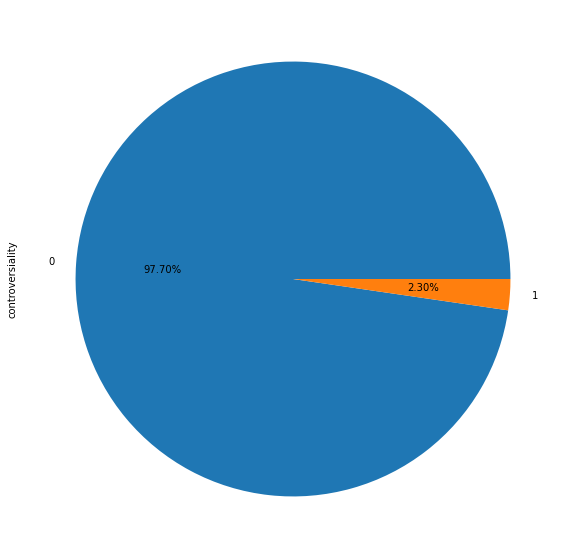

In [9]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [10]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')

In [12]:
df["controversiality"].unique()

array(['0', '1'], dtype=object)

0    484065
1     11415
Name: controversiality, dtype: int64


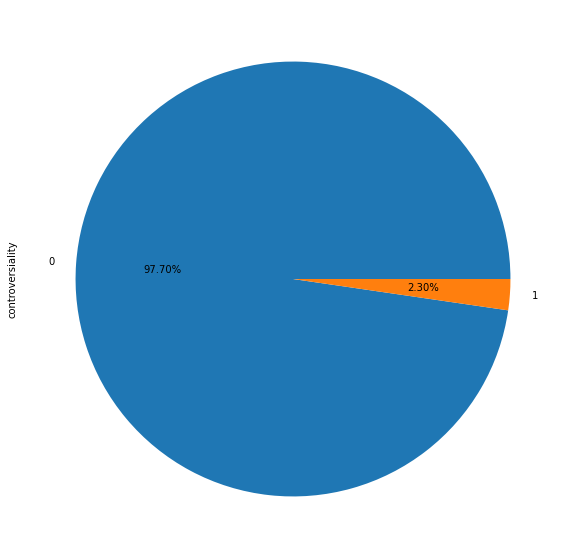

In [13]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

False    495009
True        471
Name: stickied, dtype: int64


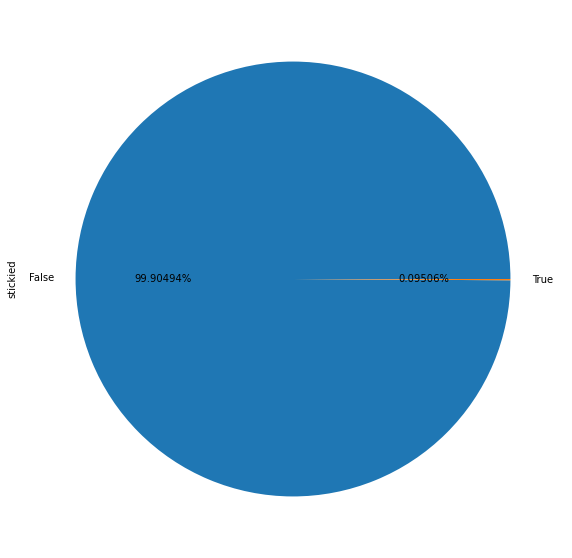

In [14]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [15]:
df["stickied"].unique()

array([False,  True])

In [16]:
df['stickied'] = df['stickied'].replace(False, "0")
df['stickied'] = df['stickied'].replace(True, "1")

In [17]:
df["stickied"].unique()

array(['0', '1'], dtype=object)

0    495009
1       471
Name: stickied, dtype: int64


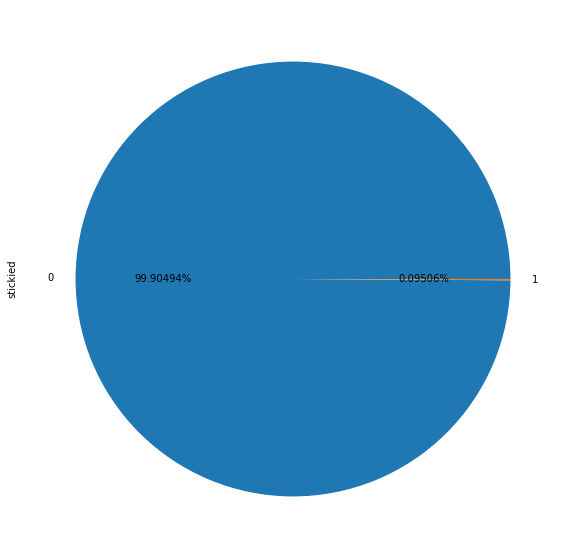

In [18]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

# Link_id

t3_dv9afw    5940
t3_dwmlki    4003
t3_e025s8    3960
t3_dsj4nn    3561
t3_duk7rb    2884
             ... 
t3_bttc02       1
t3_dnf5gm       1
t3_dtnqgd       1
t3_dkzujt       1
t3_e45xux       1
Name: link_id, Length: 37277, dtype: int64


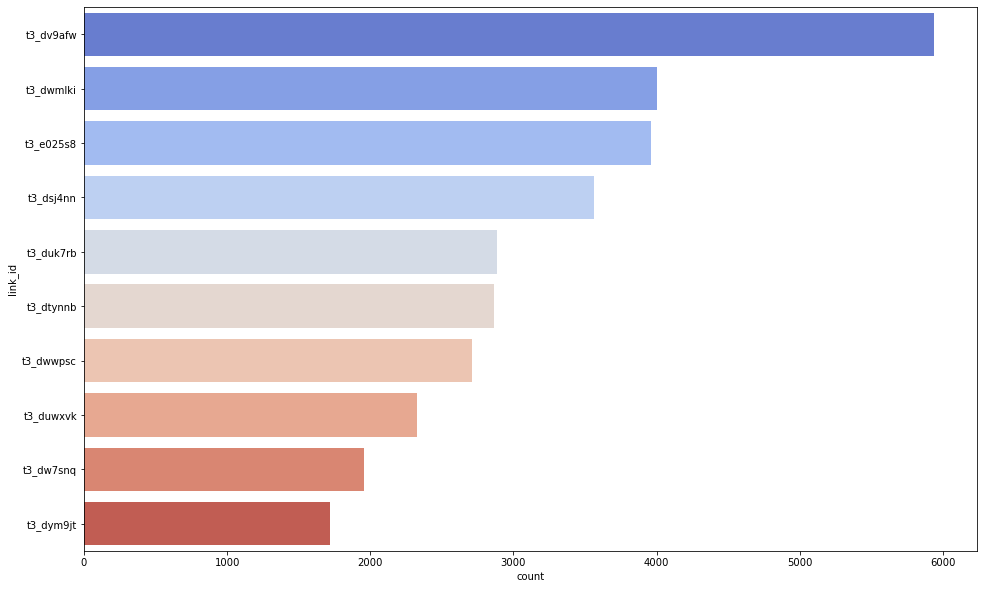

In [19]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [20]:
df[df['link_id'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday


# Subreddit_id

t5_2r0cn    495480
Name: subreddit_id, dtype: int64


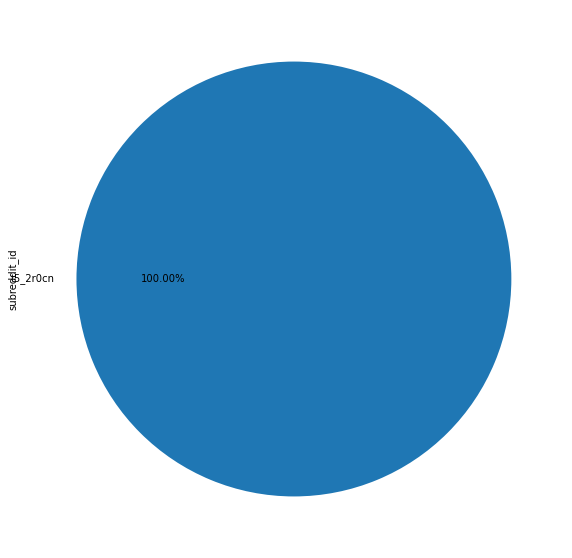

In [21]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 

In [22]:
df[df['subreddit_id'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday


# Author

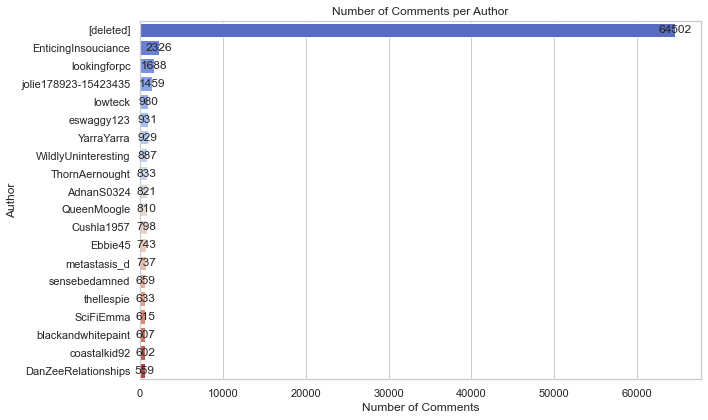

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [24]:
 df[df['author'].str.contains('AutoModerator')]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday
22461,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580637900,1,False,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
32735,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580716892,2,False,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
39567,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580785760,1,False,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
51809,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580849841,1,False,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
52067,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580850767,1,False,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468953,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584055648,1,False,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
471617,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584064140,1,False,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
474052,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584072173,-9,False,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN
478798,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584087919,1,False,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN


In [25]:
df = df[df['author'] != 'AutoModerator']

In [26]:
 df[df['author'].str.contains('AutoModerator')]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday


# Author flair text

In [27]:
df['author_flair_text'].fillna('0', inplace=True)

0                            471722
40s Male                       3931
Early 30s Male                 2238
Late 20s Male                  1967
Early 30s Female               1832
Early 20s Female               1728
Late 20s Female                1637
Late 30s Female                1363
Late 30s Male                  1218
50s Male                       1207
Early 20s Male                 1122
Early 30s                       806
Squire                          762
Verified Crisis Counselor       743
Teens Male                      600
Early 20s                       380
60+ Female                      364
Teens Female                    358
40s Female                      312
Late 30s                        281
Probably Human                  225
Late 20s                        206
"just break up"                 138
50s Female                       86
Teens                            53
Moderator                        53
40s                              24
60+ Male                    

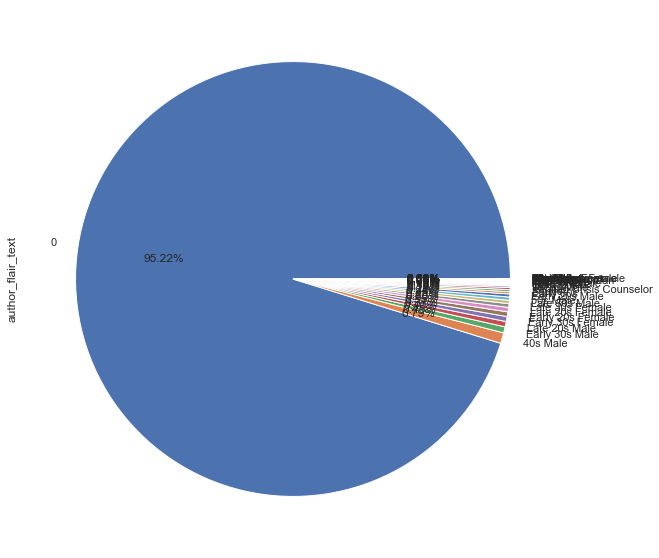

In [28]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

0                            471722
40s Male                       3931
Early 30s Male                 2238
Late 20s Male                  1967
Early 30s Female               1832
Early 20s Female               1728
Late 20s Female                1637
Late 30s Female                1363
Late 30s Male                  1218
50s Male                       1207
Early 20s Male                 1122
Early 30s                       806
Squire                          762
Verified Crisis Counselor       743
Teens Male                      600
Early 20s                       380
60+ Female                      364
Teens Female                    358
40s Female                      312
Late 30s                        281
Probably Human                  225
Late 20s                        206
"just break up"                 138
50s Female                       86
Teens                            53
Moderator                        53
40s                              24
60+ Male                    

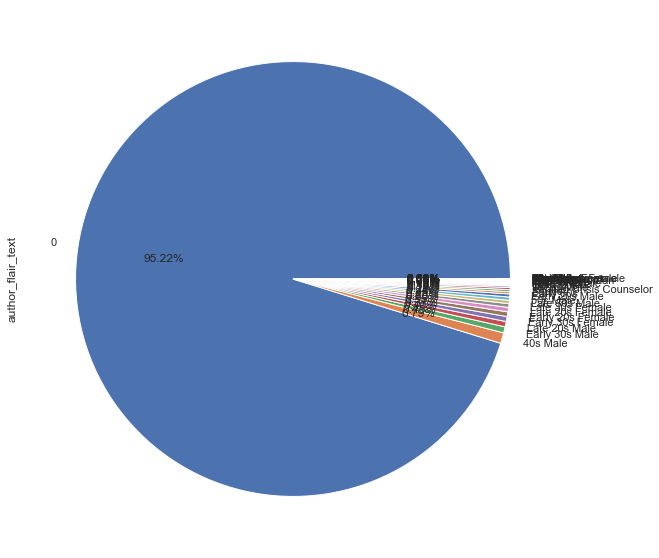

In [29]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationship_advice    495395
Name: subreddit, dtype: int64


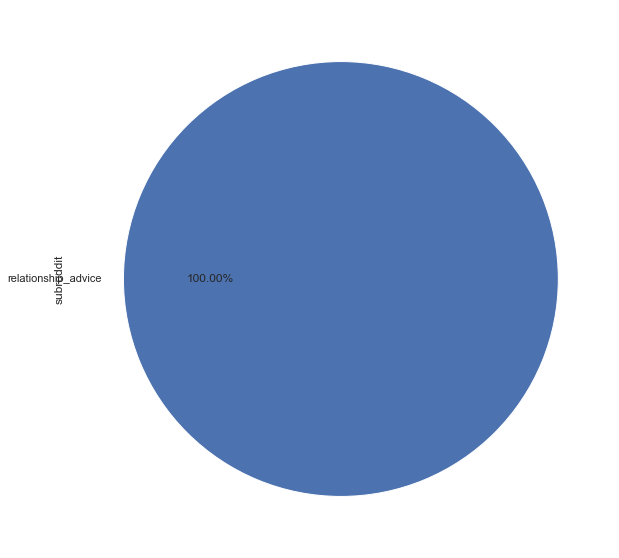

In [30]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [31]:
df[df['subreddit'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday


# Created_utc

In [32]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [33]:
df['created_utc']

0        2019-11-01 00:00:07
1        2019-11-01 00:00:07
2        2019-11-01 00:00:11
3        2019-11-01 00:00:21
4        2019-11-01 00:00:23
                 ...        
495475   2019-11-30 23:59:46
495476   2019-11-30 23:59:49
495477   2019-11-30 23:59:51
495478   2019-11-30 23:59:51
495479   2019-11-30 23:59:54
Name: created_utc, Length: 495395, dtype: datetime64[ns]

In [34]:
df[df['created_utc'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday


# Hours

Text(0, 0.5, 'Anzahl der Kommentare')

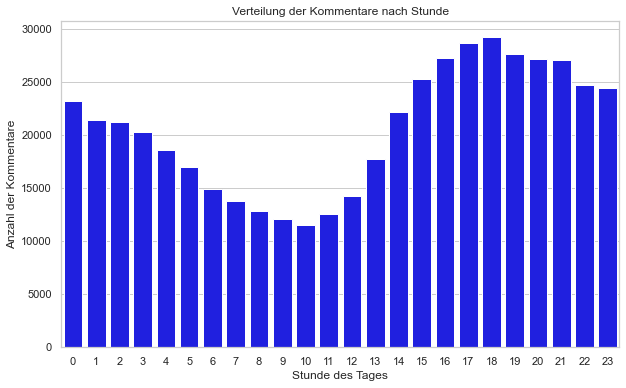

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

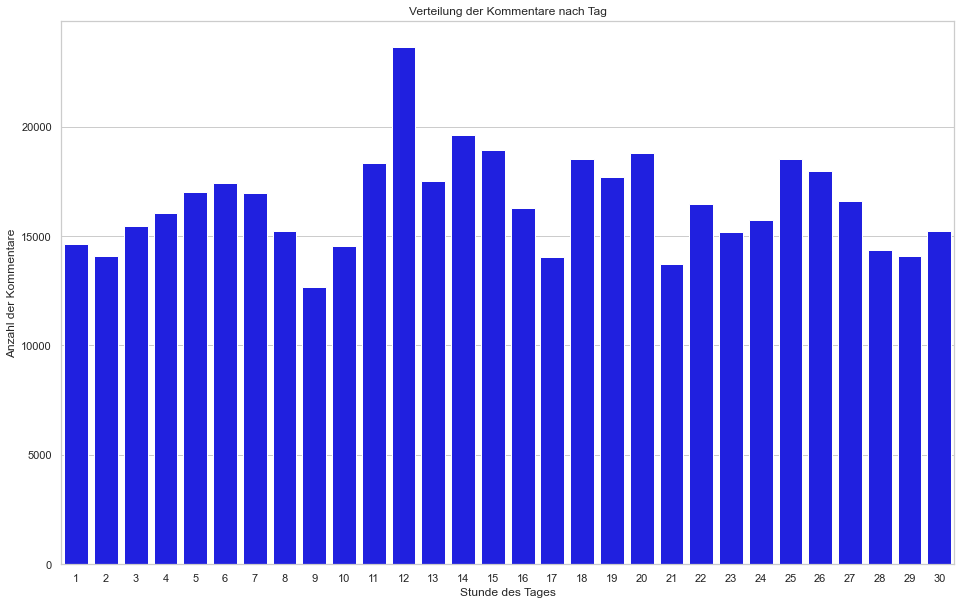

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

In [37]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [38]:
df['created_year'].unique()

array([2019])

# Gilded

0    495233
1       143
2        15
3         2
7         1
4         1
Name: gilded, dtype: int64


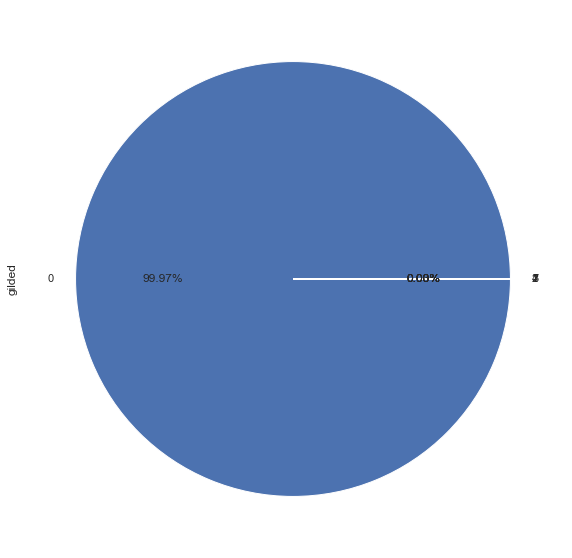

In [39]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

In [40]:
df["gilded"].unique()

array([0, 1, 2, 7, 4, 3])

In [41]:
df["gilded"] = df["gilded"].replace(0,"0")
df["gilded"] = df["gilded"].replace(1, "1")
df["gilded"] = df["gilded"].replace(2, "2")
df["gilded"] = df["gilded"].replace(3, "3")
df["gilded"] = df["gilded"].replace(4, "4")
df["gilded"] = df["gilded"].replace(7, "7")

0    495233
1       143
2        15
3         2
7         1
4         1
Name: gilded, dtype: int64


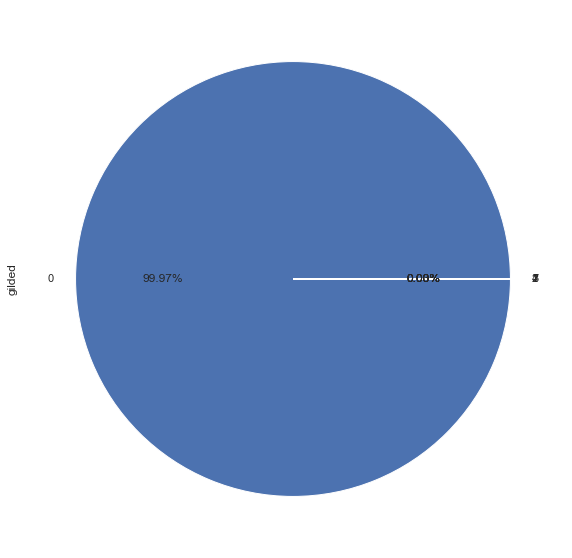

In [42]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

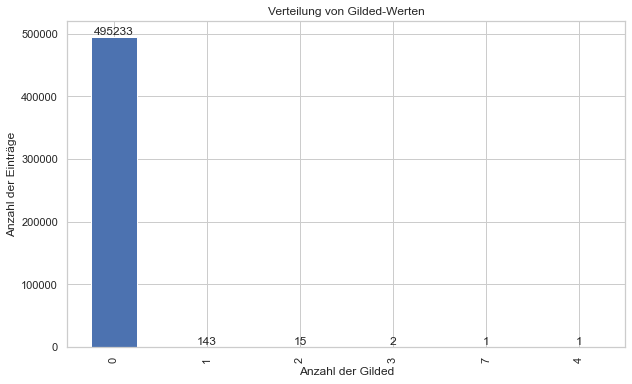

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Distinguished

In [44]:
df['distinguished'].fillna('0', inplace=True)

0            494898
moderator       497
Name: distinguished, dtype: int64


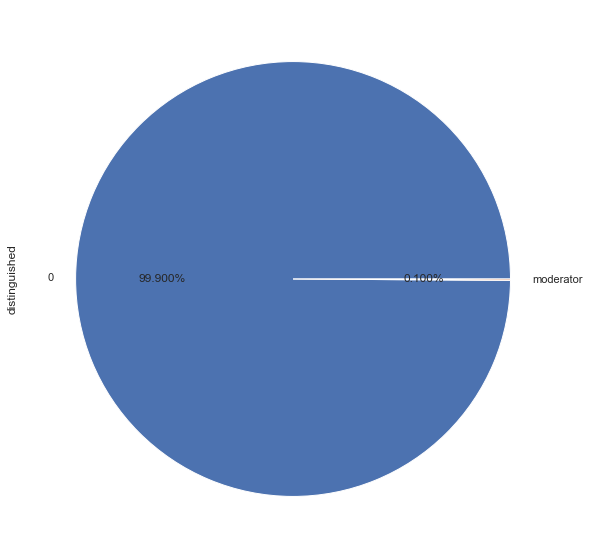

In [45]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [46]:
df["distinguished"].unique()

array(['0', 'moderator'], dtype=object)

In [52]:
 df[df['distinguished'].str.contains('moderator')]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday,created_hour,created_day,created_year
3461,[],NaN,royalyell0w,1.499140e+09,NaN,NaN,[],2bbd042a-5810-11e8-acaf-0e8c491725b0,"""just break up""",dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,5,1,2019
6991,[],NaN,royalyell0w,1.499140e+09,NaN,NaN,[],2bbd042a-5810-11e8-acaf-0e8c491725b0,"""just break up""",dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,14,1,2019
6994,[],NaN,royalyell0w,1.499140e+09,NaN,NaN,[],2bbd042a-5810-11e8-acaf-0e8c491725b0,"""just break up""",dark,...,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,14,1,2019
7055,[],NaN,royalyell0w,1.499140e+09,NaN,NaN,[],2bbd042a-5810-11e8-acaf-0e8c491725b0,"""just break up""",dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,14,1,2019
8459,[],NaN,royalyell0w,1.499140e+09,NaN,NaN,[],2bbd042a-5810-11e8-acaf-0e8c491725b0,"""just break up""",dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,16,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483446,[],NaN,Mercurycandie,1.326487e+09,NaN,mod,[],NaN,Probably Human,dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,5,30,2019
483448,[],NaN,Mercurycandie,1.326487e+09,NaN,mod,[],NaN,Probably Human,dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,5,30,2019
483452,[],NaN,Mercurycandie,1.326487e+09,NaN,mod,[],NaN,Probably Human,dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,5,30,2019
483461,[],NaN,Mercurycandie,1.326487e+09,NaN,mod,[],NaN,Probably Human,dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,5,30,2019


In [79]:
 df[df['distinguished'].str.contains('moderator')]["body"].iloc[480:498]

477403    Hey, /u/halfassoriginal. Thanks for contributi...
477407    Hey, /u/Kmulnix. Thanks for contributing! Unfo...
477409    Hey, /u/Jennappel. Thanks for contributing! Un...
477417    Hey, /u/royaltyloverforever. Thanks for contri...
477421    Hey, /u/Metal-Lee-Solid. Thanks for contributi...
477436    Hey, /u/waves-360. Thanks for contributing! Un...
480309    Hey, /u/waves-360. Thanks for contributing! Un...
480311    Hey, /u/ThePuzzySlayer. Thanks for contributin...
483412    Hey, /u/samantha2123. Thanks for contributing!...
483416    Hey, /u/halfforeign. Thanks for contributing! ...
483436    Hey, /u/1ov3c0un75. Thanks for contributing! U...
483437    Hey, /u/royaltyloverforever. Thanks for contri...
483446    Hey, /u/marshameJ. Thanks for contributing! Un...
483448    Hey, /u/metavis. Thanks for contributing! Unfo...
483452    Hey, /u/Peonies94. Thanks for contributing! Un...
483461    Hey, /u/Taylor-Z. Thanks for contributing! Unf...
483466    Hey, /u/thembitch. Thanks for 

In [80]:
behalten_indexe = [327577, 346646, 378750, 31048, 44891, 62350, 71680, 73508, 94536, 94794, 117363, 124405, 211777, 222797, 236797, 326947]

# Lösche die Zeilen, die 'distinguished' den Wert 'moderator' haben, aber nicht in der behalten_indexe-Liste enthalten sind
df = df[~((df['distinguished'] == 'moderator') & (~df.index.isin(behalten_indexe)))]


In [81]:
 df[df['distinguished'].str.contains('moderator')]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday,created_hour,created_day,created_year
31048,[],NaN,Mercurycandie,1.326487e+09,NaN,mod,[],NaN,Probably Human,dark,...,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,3,3,2019
44891,[],NaN,royalyell0w,1.499140e+09,NaN,NaN,[],2bbd042a-5810-11e8-acaf-0e8c491725b0,"""just break up""",dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,0,4,2019
62350,[],NaN,Mercurycandie,1.326487e+09,NaN,mod,[],NaN,Probably Human,dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,2,5,2019
71680,[],NaN,royalyell0w,1.499140e+09,NaN,NaN,[],2bbd042a-5810-11e8-acaf-0e8c491725b0,"""just break up""",dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,17,5,2019
73508,[],NaN,royalyell0w,1.499140e+09,NaN,NaN,[],2bbd042a-5810-11e8-acaf-0e8c491725b0,"""just break up""",dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,19,5,2019
94536,[],NaN,royalyell0w,1.499140e+09,NaN,NaN,[],2bbd042a-5810-11e8-acaf-0e8c491725b0,"""just break up""",dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,23,6,2019
94794,[],NaN,royalyell0w,1.499140e+09,NaN,NaN,[],2bbd042a-5810-11e8-acaf-0e8c491725b0,"""just break up""",dark,...,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,0,7,2019
117363,[],NaN,alcoholic_dinosaur,1.388163e+09,NaN,NaN,[],NaN,Squire,dark,...,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,10,8,2019
124405,[],NaN,alcoholic_dinosaur,1.388163e+09,NaN,NaN,[],NaN,Squire,dark,...,0,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,20,8,2019
211777,[],NaN,royalyell0w,1.499140e+09,NaN,NaN,[],2bbd042a-5810-11e8-acaf-0e8c491725b0,"""just break up""",dark,...,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,0,NaN,22,13,2019


0            494898
moderator        16
Name: distinguished, dtype: int64


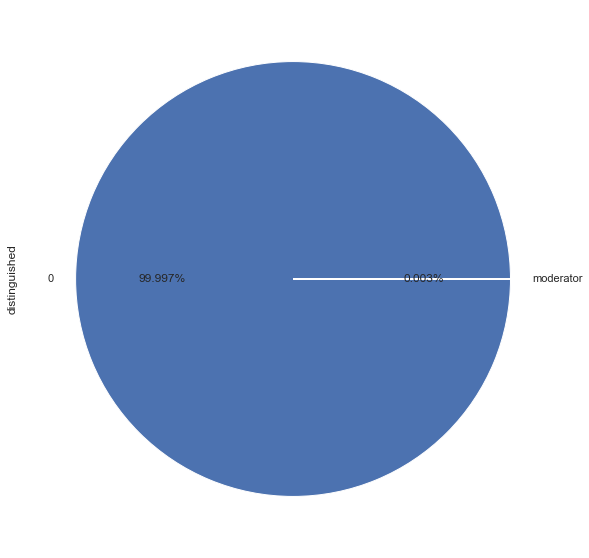

In [82]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [83]:
df["edited"].unique()

array(['False', '1572566895', '1572566965', ..., '1575173277',
       '1575158466', '1575158684'], dtype=object)

In [84]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111', "1")
df['edited'] = df['edited'].replace('False', "0")

In [85]:
df["edited"].unique()

array(['0', '1'], dtype=object)

0    479524
1     15390
Name: edited, dtype: int64


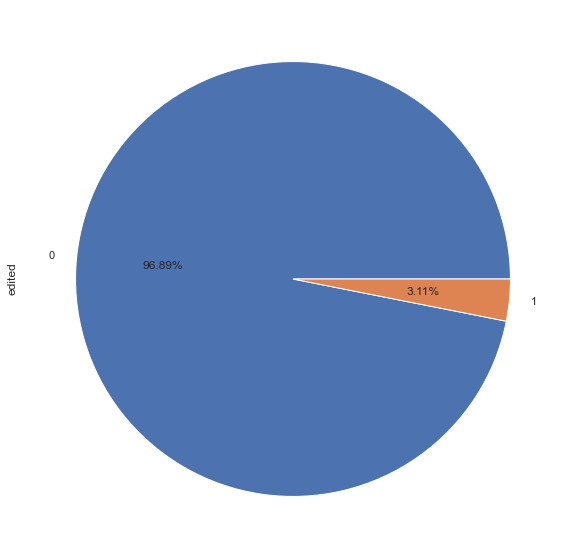

In [86]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [87]:
df[df['edited'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday,created_hour,created_day,created_year


# Score

In [88]:
df["score"].value_counts()

1       212143
2        88008
3        40491
0        23765
4        15810
         ...  
1709         1
3973         1
7030         1
3125         1
952          1
Name: score, Length: 1518, dtype: int64

In [89]:
df['score'] = df["score"].astype(int)

In [90]:
df["score"].mean()

9.214413009128858

In [91]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,collapsed_because_crowd_control,removal_reason,retrieved_on,score,total_awards_received,created_hour,created_day,created_year
count,0.0,2.276640e+05,0.0,0.0,0.0,4.949140e+05,494914.000000,494914.000000,494914.000000,494914.000000,494914.0
mean,NaN,1.478168e+09,NaN,NaN,NaN,1.582376e+09,9.214413,0.001665,12.562682,15.509644,2019.0
std,NaN,7.473621e+07,NaN,NaN,NaN,1.227976e+06,118.355277,0.066833,7.255854,8.431840,0.0
min,NaN,1.126584e+09,NaN,NaN,NaN,1.580511e+09,-719.000000,0.000000,0.000000,1.000000,2019.0
25%,NaN,1.438675e+09,NaN,NaN,NaN,1.581471e+09,1.000000,0.000000,6.000000,8.000000,2019.0
50%,NaN,1.507589e+09,NaN,NaN,NaN,1.581902e+09,1.000000,0.000000,14.000000,15.000000,2019.0
75%,NaN,1.536838e+09,NaN,NaN,NaN,1.583605e+09,3.000000,0.000000,19.000000,23.000000,2019.0
max,NaN,1.554130e+09,NaN,NaN,NaN,1.584151e+09,23396.000000,22.000000,23.000000,30.000000,2019.0


In [92]:
df.isnull().sum() 

all_awardings                           0
associated_award                   494914
author                                  0
author_created_utc                 267250
author_flair_background_color      494914
author_flair_css_class             494849
author_flair_richtext               64502
author_flair_template_id           473190
author_flair_text                       0
author_flair_text_color            407172
author_flair_type                   64502
author_fullname                     64502
author_patreon_flair                64502
author_premium                      64502
awarders                                0
body                                   10
can_gild                                0
can_mod_post                            0
collapsed                               0
collapsed_because_crowd_control    494914
collapsed_reason                   484820
controversiality                        0
created_utc                             0
distinguished                     

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494914 entries, 0 to 495479
Data columns (total 49 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   all_awardings                    494914 non-null  object        
 1   associated_award                 0 non-null       float64       
 2   author                           494914 non-null  object        
 3   author_created_utc               227664 non-null  float64       
 4   author_flair_background_color    0 non-null       float64       
 5   author_flair_css_class           65 non-null      object        
 6   author_flair_richtext            430412 non-null  object        
 7   author_flair_template_id         21724 non-null   object        
 8   author_flair_text                494914 non-null  object        
 9   author_flair_text_color          87742 non-null   object        
 10  author_flair_type                430412 non-

# Two Feature Analyses

# Hours vs Score

<AxesSubplot:xlabel='created_hour', ylabel='score'>

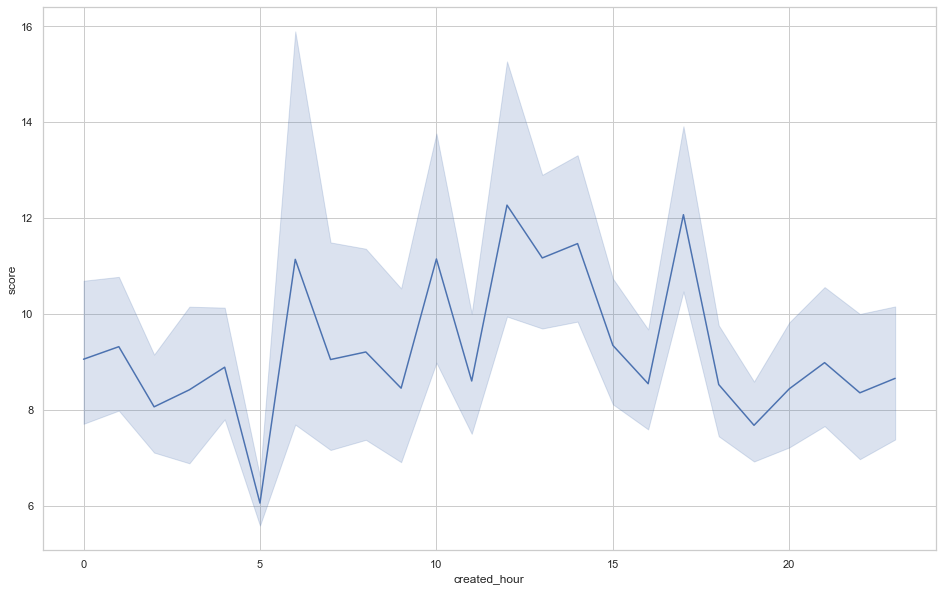

In [94]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs Score

<AxesSubplot:xlabel='created_day', ylabel='score'>

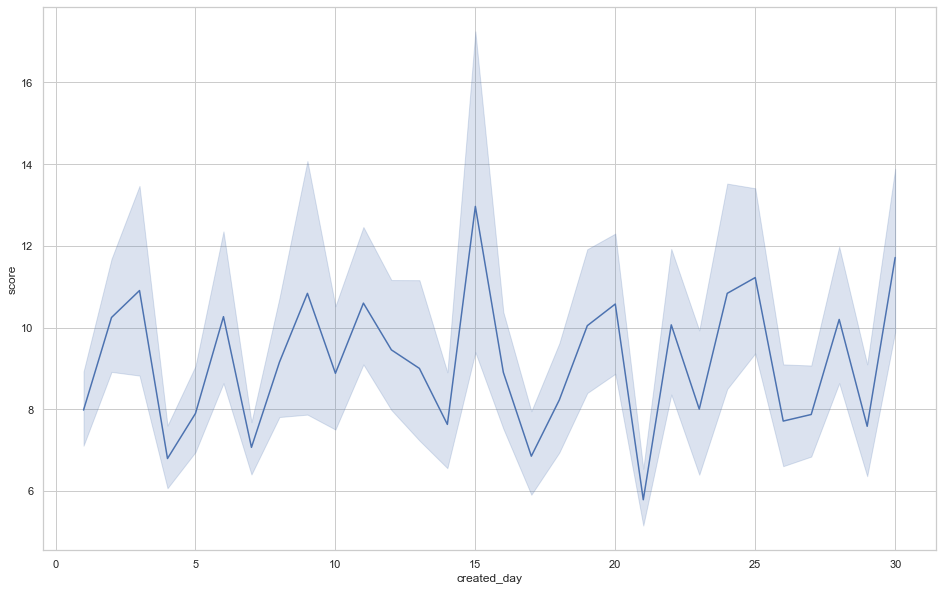

In [95]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

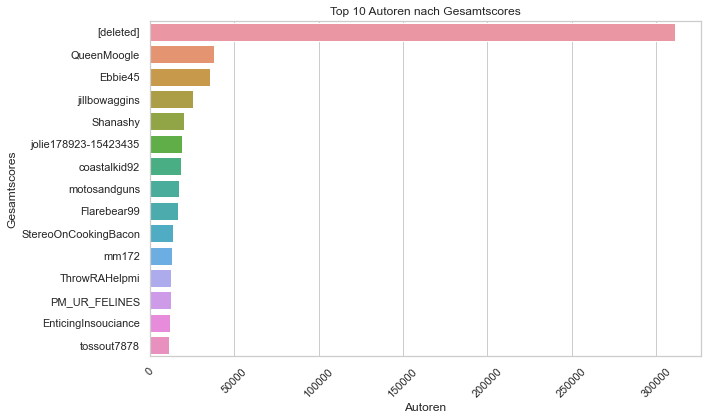

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

# Ohne deleted

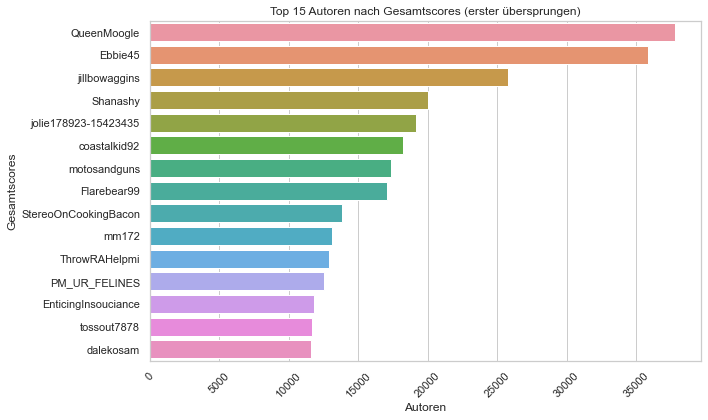

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Column removing

In [98]:
df=df.drop(["author_flair_css_class", "subreddit","retrieved_on","subreddit_id","is_submitter","subreddit_type","author_cakeday","permalink"], axis = 1)

In [99]:
df=df.drop(["author_flair_background_color","collapsed","collapsed_reason","send_replies"], axis = 1)

In [100]:
df=df.drop(["author_created_utc","author_flair_template_id","author_flair_text_color","author_fullname","can_gild","can_mod_post","gildings","no_follow","removal_reason","subreddit_name_prefixed","author_flair_richtext","author_flair_type","author_patreon_flair"], axis = 1)

In [102]:
df.columns

Index(['all_awardings', 'associated_award', 'author', 'author_flair_text',
       'author_premium', 'awarders', 'body', 'collapsed_because_crowd_control',
       'controversiality', 'created_utc', 'distinguished', 'edited', 'gilded',
       'id', 'link_id', 'locked', 'parent_id', 'quarantined', 'score',
       'stickied', 'total_awards_received', 'created_hour', 'created_day',
       'created_year'],
      dtype='object')

In [104]:
df=df.drop(["all_awardings","associated_award","author_premium","awarders","collapsed_because_crowd_control","locked","quarantined","total_awards_received"], axis = 1)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494914 entries, 0 to 495479
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             494914 non-null  object        
 1   author_flair_text  494914 non-null  object        
 2   body               494904 non-null  object        
 3   controversiality   494914 non-null  object        
 4   created_utc        494914 non-null  datetime64[ns]
 5   distinguished      494914 non-null  object        
 6   edited             494914 non-null  object        
 7   gilded             494914 non-null  object        
 8   id                 494914 non-null  object        
 9   link_id            494914 non-null  object        
 10  parent_id          494914 non-null  object        
 11  score              494914 non-null  int64         
 12  stickied           494914 non-null  object        
 13  created_hour       494914 non-null  int64   

In [106]:
df.isnull().sum() 

author                0
author_flair_text     0
body                 10
controversiality      0
created_utc           0
distinguished         0
edited                0
gilded                0
id                    0
link_id               0
parent_id             0
score                 0
stickied              0
created_hour          0
created_day           0
created_year          0
dtype: int64

# Row Deleting

# Delete all comments that have a NA

In [107]:
df[pd.isna(df['body'])]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
36715,CuckyMcCuckerCuck,0,NaN,0,2019-11-03 14:55:59,0,1,0,f6dbikc,t3_dr1cnp,t1_f6db4qk,1,0,14,3,2019
170062,DoobsandStuff,0,NaN,0,2019-11-11 21:08:36,0,1,0,f79esoy,t3_duynto,t1_f79elr3,1,0,21,11,2019
174313,scowall,0,NaN,0,2019-11-12 01:52:41,0,0,0,f7a94ow,t3_duwxvk,t1_f79gzwj,-6,0,1,12,2019
196047,[deleted],0,NaN,0,2019-11-12 23:53:37,0,1,0,f7cy6dx,t3_dvi029,t3_dvi029,3,0,23,12,2019
196161,[deleted],0,NaN,0,2019-11-13 00:04:28,0,1,0,f7cz3v0,t3_dvhss8,t3_dvhss8,3,0,0,13,2019
196666,[deleted],0,NaN,0,2019-11-13 00:48:25,0,1,0,f7d2r5f,t3_dviago,t1_f7cupid,2,0,0,13,2019
207526,[deleted],0,NaN,0,2019-11-13 18:16:32,0,1,0,f7ez8bd,t3_dvulqj,t3_dvulqj,11,0,18,13,2019
208033,[deleted],0,NaN,0,2019-11-13 18:46:08,0,1,0,f7f24n2,t3_dvulqj,t1_f7f1fj1,3,0,18,13,2019
224609,[deleted],0,NaN,0,2019-11-14 16:41:29,0,1,0,f7hy9ks,t3_dvvnr9,t1_f7hxsjr,1,0,16,14,2019
471508,studentischerberater,0,NaN,0,2019-11-29 09:49:47,0,1,0,f92alnx,t3_e3cggp,t1_f92a261,1,0,9,29,2019


In [108]:
df = df.dropna(subset=['body'])

In [109]:
df.isnull().sum() 

author               0
author_flair_text    0
body                 0
controversiality     0
created_utc          0
distinguished        0
edited               0
gilded               0
id                   0
link_id              0
parent_id            0
score                0
stickied             0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Body Analyses and pre processing

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

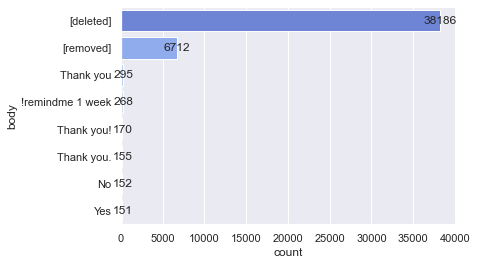

In [110]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben Removed comments mehr likes

In [111]:
filtered_df=df[df['body'] == '[removed]']

In [112]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,6712.000000,6712.000000,6712.000000,6712.0
mean,1.955900,12.357718,14.430125,2019.0
std,63.092587,7.128534,7.901148,0.0
min,-719.000000,0.000000,1.000000,2019.0
25%,0.000000,6.000000,8.000000,2019.0
50%,1.000000,14.000000,14.000000,2019.0
75%,1.000000,18.000000,20.000000,2019.0
max,3026.000000,23.000000,30.000000,2019.0


In [113]:
len(filtered_df)

6712

Text(0.5, 1.0, 'Histogramm der Scores')

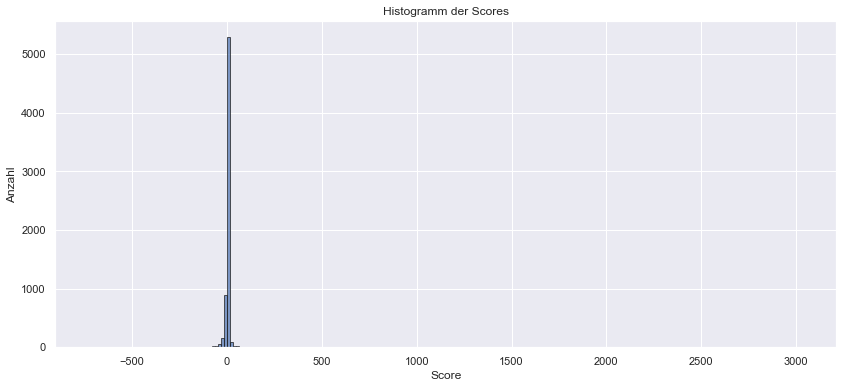

In [114]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

removed Kommentare löschen

In [115]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

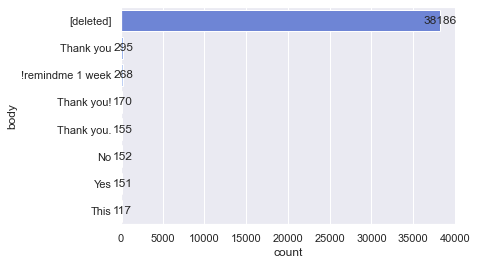

In [116]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben Deleted comments mehr likes

In [117]:
filtered_df_del=df[df['body'] == '[deleted]']

In [118]:
filtered_df_del

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1,[deleted],0,[deleted],0,2019-11-01 00:00:07,0,0,0,f5z3q5m,t3_dpucws,t1_f5z3872,-4,0,0,1,2019
19,[deleted],0,[deleted],0,2019-11-01 00:01:35,0,0,0,f5z3voq,t3_dpwdr0,t3_dpwdr0,1,0,0,1,2019
26,[deleted],0,[deleted],0,2019-11-01 00:02:48,0,0,0,f5z402n,t3_dpucws,t1_f5z3h0e,-5,0,0,1,2019
35,[deleted],0,[deleted],0,2019-11-01 00:03:48,0,0,0,f5z43tf,t3_dptd9h,t3_dptd9h,1,0,0,1,2019
44,[deleted],0,[deleted],0,2019-11-01 00:04:44,0,0,0,f5z475r,t3_dpwbla,t3_dpwbla,0,0,0,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495434,[deleted],0,[deleted],0,2019-11-30 23:56:36,0,0,0,f973556,t3_e45knt,t3_e45knt,2,0,23,30,2019
495435,[deleted],0,[deleted],0,2019-11-30 23:56:40,0,0,0,f9735d3,t3_e43dvl,t1_f972vz1,2,0,23,30,2019
495446,[deleted],0,[deleted],0,2019-11-30 23:57:42,0,0,0,f9738ol,t3_e43dvl,t1_f9734yw,-42,0,23,30,2019
495466,[deleted],0,[deleted],0,2019-11-30 23:59:16,0,0,0,f973dhg,t3_e41eiw,t3_e41eiw,-1,0,23,30,2019


In [119]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,38186.000000,38186.000000,38186.000000,38186.0
mean,4.026816,12.580422,15.830959,2019.0
std,71.741367,7.270323,8.454064,0.0
min,-314.000000,0.000000,1.000000,2019.0
25%,1.000000,6.000000,9.000000,2019.0
50%,1.000000,14.000000,15.000000,2019.0
75%,2.000000,19.000000,23.000000,2019.0
max,8120.000000,23.000000,30.000000,2019.0


In [120]:
len(filtered_df_del)

38186

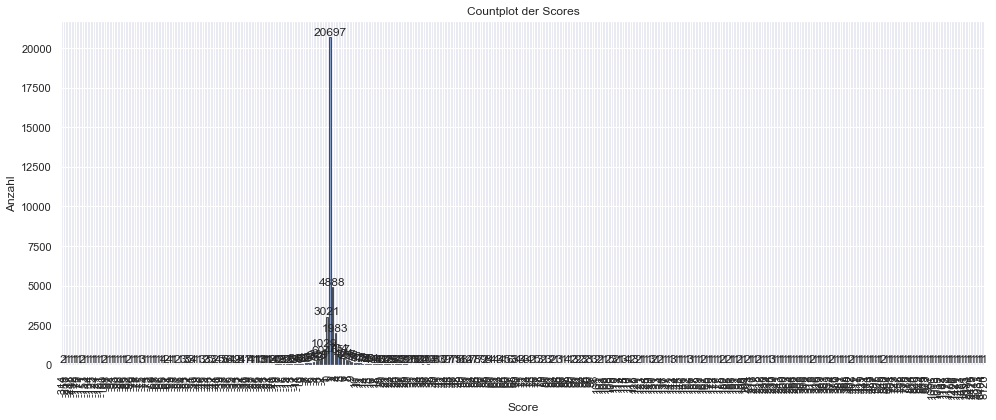

In [121]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')
plt.tight_layout()
# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Kommentare die deleted wurden löschen

In [122]:
df = df[df['body'] != '[deleted]']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

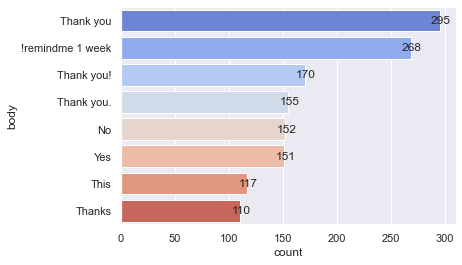

In [123]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

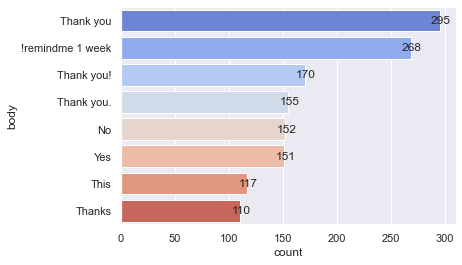

In [124]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [125]:
df[df['body'] == "."]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
16517,supyeast,0,.,0,2019-11-02 03:31:27,0,1,0,f62qx8o,t3_dq3zbs,t3_dq3zbs,1,0,3,2,2019
16846,supyeast,0,.,0,2019-11-02 04:12:58,0,1,0,f62w50g,t3_dpysdg,t1_f5zkm2m,0,0,4,2,2019
17034,NarwhalTheUnicorn,0,.,0,2019-11-02 04:40:21,0,0,0,f6308wg,t3_dqf89u,t1_f62z4gj,1,0,4,2,2019
136366,Static147,0,.,0,2019-11-09 18:51:11,0,1,0,f7080gl,t3_dtvjk0,t3_dtvjk0,-2,0,18,9,2019
136779,Static147,0,.,0,2019-11-09 19:31:46,0,1,0,f70frpy,t3_dtvqad,t1_f6z71sk,3,0,19,9,2019
183891,roadsidedeadcat,0,.,0,2019-11-12 15:44:23,0,1,0,f7bnox8,t3_dv9afw,t3_dv9afw,1,0,15,12,2019
187340,NoImNotYourDaddy,0,.,0,2019-11-12 17:16:32,0,0,0,f7bw6sf,t3_dv9afw,t3_dv9afw,1,0,17,12,2019
210818,Wubbysandwubbysonly,0,.,0,2019-11-13 21:17:03,0,0,0,f7fi0ox,t3_dvnbc4,t3_dvnbc4,0,0,21,13,2019
240238,springx3,0,.,0,2019-11-15 11:38:33,0,1,0,f7kmbip,t3_dwmlki,t1_f7kltub,5,0,11,15,2019
269975,Justyew0789,0,.,0,2019-11-17 02:41:37,0,1,0,f7q42bu,t3_dxb200,t3_dxb200,1,0,2,17,2019


In [126]:
df = df[df['body'] != '.']

In [127]:
df[df['body'] == "."]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [128]:
df[df['body'] == "Remindme! 5 days"]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [129]:
df[df['body'] == "F"]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
48119,DominateDave,0,F,0,2019-11-04 04:34:54,0,0,0,f6hbjaf,t3_drckj5,t3_drckj5,0,0,4,4,2019
54987,ddlong8,0,F,0,2019-11-04 18:24:40,0,0,0,f6jaxix,t3_dri3fg,t3_dri3fg,1,0,18,4,2019
56029,IrresponsibleSpoon,0,F,0,2019-11-04 19:24:09,0,0,0,f6jizzh,t3_dritsp,t3_dritsp,1,0,19,4,2019
60698,touchmyhamster,0,F,0,2019-11-05 00:29:44,0,0,0,f6kk8px,t3_drquyq,t1_f6kj0jb,1,0,0,5,2019
77378,SingleOnionPringle,0,F,0,2019-11-06 00:11:24,0,0,0,f6nspxi,t3_drz19o,t1_f6mdzxb,1,0,0,6,2019
127946,shit_post_city,0,F,0,2019-11-09 01:49:29,0,0,0,f6y0po9,t3_dtpih6,t3_dtpih6,-6,0,1,9,2019
146090,FranklinVille,0,F,0,2019-11-10 10:59:56,0,0,0,f72x05s,t3_dtynnb,t1_f72u52m,3,0,10,10,2019
189655,lunamoon1994,0,F,0,2019-11-12 18:07:54,0,0,0,f7c12po,t3_dv9afw,t3_dv9afw,1,0,18,12,2019
191121,jfciv,0,F,0,2019-11-12 18:41:36,0,0,0,f7c4awp,t3_dv9afw,t3_dv9afw,1,0,18,12,2019
191392,mynameisstryker,Early 20s Male,F,0,2019-11-12 18:48:05,0,0,0,f7c4x7s,t3_dvcxeo,t1_f7bytle,6,0,18,12,2019


In [130]:
df = df[df['body'] != 'F']

In [131]:
df[df['body'].str.contains('Remind me')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
4683,randoredditrat,0,"So, I'm just going to flat out say it. I didn'...",0,2019-11-01 08:56:45,0,0,0,f600gne,t3_dpuxuu,t3_dpuxuu,1,0,8,1,2019
97868,RZDEMON0999,0,Remind me! 1 week,0,2019-11-07 03:38:21,0,0,0,f6raf98,t3_dsmcm0,t3_dsmcm0,1,0,3,7,2019
113842,StressedTee,0,Remind me!,0,2019-11-08 04:03:52,0,0,0,f6vguf1,t3_dt4981,t3_dt4981,1,0,4,8,2019
117577,tothrowawayyyy,0,Remind me! 2 days,0,2019-11-08 11:25:12,0,0,0,f6w1g60,t3_dtb7yh,t3_dtb7yh,1,0,11,8,2019
118020,[deleted],0,Remind me! 1 week,0,2019-11-08 12:10:46,0,0,0,f6w3ko5,t3_dtb7yh,t3_dtb7yh,1,0,12,8,2019
141881,ManicDiscretion,0,Remind me in 10 years. (=,0,2019-11-10 02:51:14,0,0,0,f7266sw,t3_du5hht,t1_f725ahr,1,0,2,10,2019
158012,cryogenicallyhere,0,Remind me 3 days!,0,2019-11-11 05:17:04,0,0,0,f77b4il,t3_duk7rb,t3_duk7rb,1,0,5,11,2019
158495,MrYaritomo,0,!Remind me 2 days,0,2019-11-11 05:57:32,0,0,0,f77decc,t3_duk7rb,t3_duk7rb,1,0,5,11,2019
158583,brohus,0,!Remind me 1 Day,0,2019-11-11 06:06:24,0,0,0,f77dv67,t3_duk7rb,t3_duk7rb,1,0,6,11,2019
163883,HaloWarrior95,0,Remind me! One week,0,2019-11-11 15:25:31,0,0,0,f785r6w,t3_duk7rb,t3_duk7rb,2,0,15,11,2019


In [132]:
df = df[~df['body'].str.contains('Remind me')]
!remindme 1 week
df = df[~df['body'].str.contains('!remindme 1 week')]

In [133]:
df[df['body'].str.contains('Remind me')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [134]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449887 entries, 0 to 495479
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             449887 non-null  object        
 1   author_flair_text  449887 non-null  object        
 2   body               449887 non-null  object        
 3   controversiality   449887 non-null  object        
 4   created_utc        449887 non-null  datetime64[ns]
 5   distinguished      449887 non-null  object        
 6   edited             449887 non-null  object        
 7   gilded             449887 non-null  object        
 8   id                 449887 non-null  object        
 9   link_id            449887 non-null  object        
 10  parent_id          449887 non-null  object        
 11  score              449887 non-null  int64         
 12  stickied           449887 non-null  object        
 13  created_hour       449887 non-null  int64   

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               295
!remindme 1 week                                                                                                                                                                                                                                                                                                                                                                                            

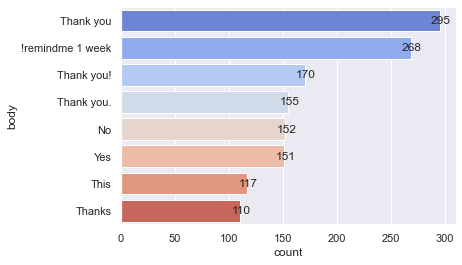

In [135]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               295
Thank you!                                                                                                                                                                                                                                                                                                                                                                                                  

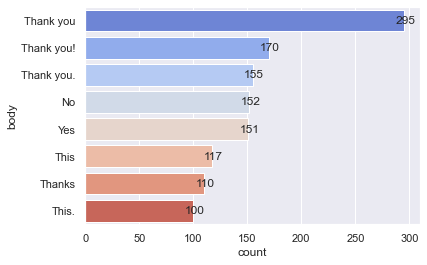

In [139]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [138]:
df = df[~df['body'].str.contains('!remindme')]

In [140]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449461 entries, 0 to 495479
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             449461 non-null  object        
 1   author_flair_text  449461 non-null  object        
 2   body               449461 non-null  object        
 3   controversiality   449461 non-null  object        
 4   created_utc        449461 non-null  datetime64[ns]
 5   distinguished      449461 non-null  object        
 6   edited             449461 non-null  object        
 7   gilded             449461 non-null  object        
 8   id                 449461 non-null  object        
 9   link_id            449461 non-null  object        
 10  parent_id          449461 non-null  object        
 11  score              449461 non-null  int64         
 12  stickied           449461 non-null  object        
 13  created_hour       449461 non-null  int64   

#  Http und Http und Redditnames removen

In [141]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

In [142]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
383,SpookiewithdatBootie,0,/r/teenagers,0,2019-11-01 00:34:37,0,0,0,f5z6ha6,t3_dpwmmj,t3_dpwmmj,2,0,0,1,2019
1581,SpookiewithdatBootie,0,/r/teenagers,0,2019-11-01 02:23:00,0,0,0,f5zeprf,t3_dpxnqp,t3_dpxnqp,1,0,2,1,2019
2065,Embracing_the_Pain,0,/r/hydrohomies,0,2019-11-01 03:08:29,0,0,0,f5zifl3,t3_dpwwl0,t1_f5zfaky,3,0,3,1,2019
3711,AuntyVenom,0,/r/deadbedrooms,0,2019-11-01 06:18:00,0,0,0,f5zuti6,t3_dq0ea8,t3_dq0ea8,2,0,6,1,2019
15187,SpookiewithdatBootie,0,/r/thatHappened,0,2019-11-02 01:09:22,0,0,0,f62ckjh,t3_dqd4eb,t3_dqd4eb,3,0,1,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478453,solaceinsleep,0,/r/loveafterporn,0,2019-11-29 21:04:19,0,0,0,f93knxz,t3_e3j0vg,t3_e3j0vg,1,0,21,29,2019
483524,AuntyVenom,0,/r/deadbedrooms,0,2019-11-30 05:33:20,0,0,0,f94l2vh,t3_e3r8fw,t3_e3r8fw,2,0,5,30,2019
491636,GayPeachesNCream,0,/r/IAmVeryBadass,0,2019-11-30 19:40:07,0,0,0,f96c68m,t3_e3vqqs,t1_f95s2dn,12,0,19,30,2019
492820,bothworks,0,/r/JustBootThings,0,2019-11-30 20:58:33,0,0,0,f96m8sh,t3_e3xi36,t1_f96fmry,2,0,20,30,2019


In [143]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men.index)

In [144]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
321895,RadicalUnicorndust,0,http://parrishmiller.com/narcissists.html,0,2019-11-20 03:50:01,0,0,0,f83v50f,t3_dyv72x,t1_f83uu3q,2,0,3,20,2019


In [145]:
df = df.drop(selected_rows.index)

In [146]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
10598,utigeim,0,https://m.youtube.com/watch?v=pXOK-ZVJMaU&amp;...,0,2019-11-01 18:33:53,0,0,0,f614ztk,t3_dq3zbs,t3_dq3zbs,2,0,18,1,2019
31755,Greenann32,0,https://m.youtube.com/watch?v=mB1vV2EgS5A,0,2019-11-03 04:39:49,0,0,0,f6af59m,t3_dps6tb,t3_dps6tb,1,0,4,3,2019
34502,Astronut27,0,https://www.theoriginalmoonlamp.com/?utm_sourc...,0,2019-11-03 10:00:19,0,0,0,f6blgnd,t3_dqy7ia,t3_dqy7ia,2,0,10,3,2019
55600,starscweam,0,https://youtu.be/PlV25s-f2Bc,0,2019-11-04 19:01:21,0,0,0,f6jfvug,t3_drjhl3,t3_drjhl3,1,0,19,4,2019
76530,CoolGas8,0,https://youtu.be/XH477jxY8ZI,0,2019-11-05 22:57:22,0,0,0,f6nm8qv,t3_drz19o,t1_f6ngt53,1,0,22,5,2019
79469,acoupleoftravels,0,https://vimeo.com/39033450,0,2019-11-06 03:01:51,0,0,0,f6o747t,t3_dsa364,t1_f6o6nmh,1,0,3,6,2019
107237,DeltaBravo25,0,https://youtu.be/RvoRNuGccGo,0,2019-11-07 19:05:33,0,0,0,f6tsmyv,t3_dt2bfc,t3_dt2bfc,1,0,19,7,2019
109257,PatientBalance,0,https://www.businessinsider.com/valentines-day...,0,2019-11-07 20:51:39,0,0,0,f6u9lqs,t3_dt3zu5,t3_dt3zu5,1,0,20,7,2019
111182,ThornAernought,0,https://www.crisistextline.org/depression,0,2019-11-07 23:13:21,0,0,0,f6utmdo,t3_dt5xno,t1_f6utj8v,1,0,23,7,2019
117550,JeffGodOBiscuits,0,https://www.youtube.com/watch?v=86URGgqONvA,0,2019-11-08 11:20:48,0,0,0,f6w19hm,t3_dtau6p,t3_dtau6p,1,0,11,8,2019


In [147]:
df = df.drop(selected_rows_2.index)

In [148]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [149]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1987,FuckAllOfThisJNMIL,0,r/hydrohomies,0,2019-11-01 03:02:30,0,0,0,f5zhwo6,t3_dpwwl0,t1_f5zfaky,7,0,3,1,2019
3048,donadosite,0,r/IHaveSex,0,2019-11-01 05:01:57,0,0,0,f5zr7yt,t3_dpoid2,t1_f5zmn6l,26,0,5,1,2019
3495,Redbird2992,0,r/unexpectedalabama,0,2019-11-01 05:53:22,0,0,0,f5zttnd,t3_dpl6rf,t3_dpl6rf,1,0,5,1,2019
10903,dylannngoesharder,0,r/ihavesex,0,2019-11-01 18:50:47,0,0,0,f616icg,t3_dq7440,t1_f60xkv4,1,0,18,1,2019
13310,Very-THIOCC-Cat,0,r/im14andthisisdeep,0,2019-11-01 21:53:26,0,0,0,f61ri6m,t3_dqax9o,t3_dqax9o,1,0,21,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484965,ArethusaF38,0,r/BoneAppleTea,0,2019-11-30 08:50:07,0,0,0,f94ub8h,t3_e3j8da,t1_f94fszd,2,0,8,30,2019
484974,TravellingGuinaPig,0,r/whoosh,0,2019-11-30 08:51:11,0,0,0,f94ucpk,t3_e3ooc6,t1_f94thtd,8,0,8,30,2019
485775,bluewave41,Early 20s,r/sex,0,2019-11-30 10:44:25,0,0,0,f94ylr5,t3_e3qe7l,t3_e3qe7l,2,0,10,30,2019
486124,parranna,0,r/nope,0,2019-11-30 11:35:26,0,0,0,f950gaf,t3_e3uyu5,t3_e3uyu5,7,0,11,30,2019


In [150]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men_two.index)

In [151]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [152]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [153]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1833,WicGoingAnonymous,Late 20s Female,https://english.emmaclit.com/2017/05/20/you-sh...,0,2019-11-01 02:50:05,0,0,0,f5zgsxo,t3_dpon8i,t1_f5x2uvd,3,0,2,1,2019
2136,cmh0277,0,https://english.emmaclit.com/2017/05/20/you-sh...,0,2019-11-01 03:16:32,0,0,0,f5zj551,t3_dpon8i,t1_f5y6kbk,3,0,3,1,2019
6198,Joe_Mama,0,https://www.reddit.com/r/exchristian/comments/...,0,2019-11-01 12:45:46,0,0,0,f60b9l9,t3_dpvpz5,t1_f6091qr,1,0,12,1,2019
16459,smash3r_18,0,https://www.nbcnews.com/better/business/diamon...,0,2019-11-02 03:25:12,0,0,0,f62qd88,t3_dqdnps,t1_f62q3d6,0,0,3,2,2019
28429,TheSuperiorLightBeer,0,https://en.m.wikipedia.org/wiki/Factitious_dis...,0,2019-11-02 23:30:55,0,0,0,f697o2d,t3_dqne6b,t1_f69717f,18,0,23,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464172,litl_buni,0,https://www.reddit.com/r/relationship_advice/c...,0,2019-11-28 20:56:28,0,0,0,f90n3sm,t3_e2n19f,t1_f8zq65v,4,0,20,28,2019
464174,litl_buni,0,https://www.reddit.com/r/relationship_advice/c...,0,2019-11-28 20:56:35,0,0,0,f90n4gr,t3_e2n19f,t1_f8yku51,4,0,20,28,2019
464176,litl_buni,0,https://www.reddit.com/r/relationship_advice/c...,0,2019-11-28 20:56:42,0,0,0,f90n531,t3_e2n19f,t1_f8za2mr,5,0,20,28,2019
467069,accio_peni,0,https://grammar.yourdictionary.com/punctuation...,0,2019-11-29 01:27:33,0,0,0,f91iaki,t3_e2io6o,t1_f91gt05,1,0,1,29,2019


In [154]:
df.drop(url_only_rows.index, inplace=True)

# Delete Bots

In [155]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [156]:
df[df['author'] == 'theHelperdroid']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [157]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_22633/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1209,Steakman1,0,Had to see if you were a bot or troll or not. ...,0,2019-11-01 01:45:14,0,0,0,f5zbwu1,t3_dpqr26,t1_f5z70ao,1,0,1,1,2019
1471,RemindMeBot,0,I will be messaging you on [**2019-11-08 02:11...,0,2019-11-01 02:11:42,0,1,0,f5zdvzn,t3_dpshv7,t1_f5zdut9,1,0,2,1,2019
1527,RemindMeBot,0,I will be messaging you on [**2019-11-08 02:17...,0,2019-11-01 02:17:35,0,1,0,f5zebdo,t3_dpupz1,t1_f5zea7d,1,0,2,1,2019
1698,[deleted],0,I just feel like they could come up with a mor...,1,2019-11-01 02:36:30,0,0,0,f5zfpp1,t3_dpxym5,t1_f5ze2ur,-4,0,2,1,2019
1775,Leohond15,0,&gt; I just feel like they could come up with ...,0,2019-11-01 02:43:39,0,0,0,f5zg85j,t3_dpxym5,t1_f5zfpp1,2,0,2,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491902,RAdviceBot,0,You seem to have put ThrowRA in your title. Th...,0,2019-11-30 19:57:24,0,0,0,f96eg4p,t3_e42dtq,t3_e42dtq,2,0,19,30,2019
493011,[deleted],0,If you or someone you know is contemplating su...,0,2019-11-30 21:10:30,0,0,0,f96nbgz,t3_e42bps,t1_f96nbc7,9,0,21,30,2019
493020,292to137,0,Good bot,0,2019-11-30 21:11:23,0,0,0,f96ne3r,t3_e42bps,t1_f96nbgz,10,0,21,30,2019
493592,NowKissPlease,0,Good bot,0,2019-11-30 21:50:39,0,0,0,f96rkot,t3_e42bps,t1_f96nbgz,5,0,21,30,2019


In [158]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["Bot_Metric","paragraphiser_bot","PORTMANTEAU-BOT","TotesMessenger","RemindMeBot","RAdviceBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [159]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_22633/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1209,Steakman1,0,Had to see if you were a bot or troll or not. ...,0,2019-11-01 01:45:14,0,0,0,f5zbwu1,t3_dpqr26,t1_f5z70ao,1,0,1,1,2019
1698,[deleted],0,I just feel like they could come up with a mor...,1,2019-11-01 02:36:30,0,0,0,f5zfpp1,t3_dpxym5,t1_f5ze2ur,-4,0,2,1,2019
1775,Leohond15,0,&gt; I just feel like they could come up with ...,0,2019-11-01 02:43:39,0,0,0,f5zg85j,t3_dpxym5,t1_f5zfpp1,2,0,2,1,2019
1844,[deleted],0,I mean that even they were confused as to whet...,1,2019-11-01 02:51:11,0,0,0,f5zgwe1,t3_dpxym5,t1_f5zg85j,3,0,2,1,2019
2288,Syck_and_Tyred,0,"Op, try asking them “ask me something a bot ca...",0,2019-11-01 03:33:02,0,0,0,f5zkk7s,t3_dpxym5,t3_dpxym5,2,0,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474283,userleansbot,0,Author: /u/userleansbot\n___\nAnalysis of /u/M...,0,2019-11-29 15:16:45,0,0,0,f92sl61,t3_dekyfe,t1_f92sg69,1,0,15,29,2019
486232,sharmrp72,0,i talk to my workmates every night on whatsapp...,0,2019-11-30 11:53:21,0,0,0,f95146u,t3_e3ux6q,t3_e3ux6q,3,0,11,30,2019
493011,[deleted],0,If you or someone you know is contemplating su...,0,2019-11-30 21:10:30,0,0,0,f96nbgz,t3_e42bps,t1_f96nbc7,9,0,21,30,2019
493020,292to137,0,Good bot,0,2019-11-30 21:11:23,0,0,0,f96ne3r,t3_e42bps,t1_f96nbgz,10,0,21,30,2019


In [160]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["userleansbot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [161]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_22633/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1209,Steakman1,0,Had to see if you were a bot or troll or not. ...,0,2019-11-01 01:45:14,0,0,0,f5zbwu1,t3_dpqr26,t1_f5z70ao,1,0,1,1,2019
1698,[deleted],0,I just feel like they could come up with a mor...,1,2019-11-01 02:36:30,0,0,0,f5zfpp1,t3_dpxym5,t1_f5ze2ur,-4,0,2,1,2019
1775,Leohond15,0,&gt; I just feel like they could come up with ...,0,2019-11-01 02:43:39,0,0,0,f5zg85j,t3_dpxym5,t1_f5zfpp1,2,0,2,1,2019
1844,[deleted],0,I mean that even they were confused as to whet...,1,2019-11-01 02:51:11,0,0,0,f5zgwe1,t3_dpxym5,t1_f5zg85j,3,0,2,1,2019
2288,Syck_and_Tyred,0,"Op, try asking them “ask me something a bot ca...",0,2019-11-01 03:33:02,0,0,0,f5zkk7s,t3_dpxym5,t3_dpxym5,2,0,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473592,MyCatIsCuteAsFuck,0,Hahahaha you’re making so many assumptions. He...,0,2019-11-29 14:19:31,0,0,0,f92mtv0,t3_e3f01k,t1_f92mjdl,3,0,14,29,2019
486232,sharmrp72,0,i talk to my workmates every night on whatsapp...,0,2019-11-30 11:53:21,0,0,0,f95146u,t3_e3ux6q,t3_e3ux6q,3,0,11,30,2019
493011,[deleted],0,If you or someone you know is contemplating su...,0,2019-11-30 21:10:30,0,0,0,f96nbgz,t3_e42bps,t1_f96nbc7,9,0,21,30,2019
493020,292to137,0,Good bot,0,2019-11-30 21:11:23,0,0,0,f96ne3r,t3_e42bps,t1_f96nbgz,10,0,21,30,2019


In [162]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [163]:
 df[df['author'] == 'AdviceHelperBot']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [164]:
 df[df['author'] == 'theHelperdroid']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [165]:
df_bot=pd.read_csv("bot_names.csv")

In [166]:
df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [167]:
df_check_bot=df.filter(items = mask[mask].index, axis=0)

In [168]:
df_check_bot

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
126,anomalous_cowherd,0,Some people see making their partner happy as ...,0,2019-11-01 00:11:52,0,0,0,f5z4qzk,t3_dpr5so,t1_f5z1f2v,11,0,0,1,2019
136,fermat1432,0,"He may have a lower libido than you, but be sh...",0,2019-11-01 00:12:29,0,0,0,f5z4spo,t3_dpwbla,t3_dpwbla,3,0,0,1,2019
198,metastasis_d,Squire,I would split up and move on.,0,2019-11-01 00:18:42,0,0,0,f5z59kc,t3_dpuf7x,t3_dpuf7x,1,0,0,1,2019
218,metastasis_d,Squire,There is no compromise between wanting kids an...,0,2019-11-01 00:20:35,0,0,0,f5z5emx,t3_dpuf7x,t1_f5ylshd,1,0,0,1,2019
232,metastasis_d,Squire,What would be the point of this exercise?,0,2019-11-01 00:21:46,0,0,0,f5z5hvc,t3_dpuf7x,t1_f5ym5v6,1,0,0,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495319,lmv123reddit,0,You will never be sure. What you can do it is ...,0,2019-11-30 23:49:54,0,0,0,f972ka0,t3_e44s7m,t3_e44s7m,2,0,23,30,2019
495329,ProtocolPro22,0,I'm just stating hard cold facts.,0,2019-11-30 23:50:24,0,0,0,f972lx4,t3_e3yxgp,t1_f96xjxr,-7,0,23,30,2019
495354,helloitsme06,0,If it’s done it’s done.\n\nIf it’s not and the...,0,2019-11-30 23:51:45,0,0,0,f972q4a,t3_e44g8r,t3_e44g8r,19,0,23,30,2019
495379,helloitsme06,0,lol what do you mean by ‘discomfort’ do you me...,0,2019-11-30 23:53:19,0,0,0,f972v27,t3_e44g8r,t1_f96uhwr,3,0,23,30,2019


In [169]:
df_check_bot[df_check_bot['author'].str.contains('bot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
2045,bannerflugelbottom,0,It helps to remember that the majority of this...,1,2019-11-01 03:06:53,0,0,0,f5ziam1,t3_dpj2cy,t1_f5y32qp,0,0,3,1,2019
2681,kzreminderbot,0,"Confirmed, **snappdigger** 🧐! Your reminder is...",0,2019-11-01 04:21:49,0,0,0,f5zoea2,t3_d97th1,t1_f5zodmi,1,0,4,1,2019
3047,kzreminderbot,0,"All set, **snappdigger** 🧐! Your reminder is i...",0,2019-11-01 05:01:36,0,0,0,f5zr75d,t3_did5cd,t1_f5zr6f9,1,0,5,1,2019
3219,kzreminderbot,0,Ding dong! ⏰ Here's your reminder.\n\n&gt; [**...,0,2019-11-01 05:24:00,0,0,0,f5zsjcs,t3_dmlkc9,t1_f54g6v0,1,0,5,1,2019
4787,kzreminderbot,0,Ding dong! ⏰ Here's your reminder.\n\n&gt; [**...,0,2019-11-01 09:11:01,0,0,0,f600yui,t3_dmp66i,t1_f54y2tf,1,0,9,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483254,tiny_smile_bot,0,&gt;:)\n\n:),0,2019-11-30 04:57:19,0,0,0,f94iy4t,t3_e3c0i8,t1_f94ixmj,2,0,4,30,2019
483775,lerobinbot,0,nice,0,2019-11-30 06:06:42,0,0,0,f94mx7a,t3_e3rnwa,t3_e3rnwa,0,0,6,30,2019
484318,notjustanotherbot,0,Well congrats op. That is great for the both ...,0,2019-11-30 07:21:19,0,0,0,f94qigz,t3_e3gf4c,t3_e3gf4c,1,0,7,30,2019
486389,bothmybehalves,0,"Yes, he’s almost certainly cheating on you. Id...",0,2019-11-30 12:16:38,0,0,0,f9520yi,t3_e3ve8o,t3_e3ve8o,1,0,12,30,2019


In [184]:
df_check_bot[df_check_bot['author'].str.contains('bot')].iloc[240:250]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
467941,kzreminderbot,0,"Big_Beau, I will remind you in **6 months** on...",0,2019-11-29 02:57:03,0,0,0,f91odr3,t3_e33cna,t1_f91ob2e,1,0,2,29,2019
469367,kzreminderbot,0,Ding dong u/DaShaka9 cc u/ThrowRa6482! ⏰ Here'...,0,2019-11-29 05:20:05,0,0,0,f91xrxg,t3_e1g15i,t1_f8rng76,1,0,5,29,2019
469818,kzreminderbot,0,"Blooperscooper21, I will remind you in **1 yea...",0,2019-11-29 06:15:33,0,0,0,f92102o,t3_e33cna,t1_f920xhl,1,0,6,29,2019
470345,kzreminderbot,0,"uraveragehoe, I will remind you in **6 months*...",0,2019-11-29 07:08:41,0,0,0,f923s41,t3_e33cna,t1_f923qbi,1,0,7,29,2019
483254,tiny_smile_bot,0,&gt;:)\n\n:),0,2019-11-30 04:57:19,0,0,0,f94iy4t,t3_e3c0i8,t1_f94ixmj,2,0,4,30,2019
483775,lerobinbot,0,nice,0,2019-11-30 06:06:42,0,0,0,f94mx7a,t3_e3rnwa,t3_e3rnwa,0,0,6,30,2019
484318,notjustanotherbot,0,Well congrats op. That is great for the both ...,0,2019-11-30 07:21:19,0,0,0,f94qigz,t3_e3gf4c,t3_e3gf4c,1,0,7,30,2019
486389,bothmybehalves,0,"Yes, he’s almost certainly cheating on you. Id...",0,2019-11-30 12:16:38,0,0,0,f9520yi,t3_e3ve8o,t3_e3ve8o,1,0,12,30,2019
486410,bothmybehalves,0,"I really think so. At best, he’s being totally...",0,2019-11-30 12:19:33,0,0,0,f9525c0,t3_e3ve8o,t1_f952393,1,0,12,30,2019


In [185]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["EncouragementRobot","resavr_bot","cool-acronym-bot","	the_timezone_bot","tiny_smile_bot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]


In [171]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["kzreminderbot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [186]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["resavr_bot","societybot","by-accident-bot","morse-bot","icarebot","EncouragementRobot","trump_bot_cares","table_it_bot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [187]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["ordinarybots"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [188]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["RemindMeBot","WikiTextBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [189]:
df_check_bot[df_check_bot['author'].str.contains('WaterIsWetBot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [190]:
df_check_bot[df_check_bot['author'].str.contains('youtube')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [191]:
df[df['author'].str.contains("RedditSilverRobot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [192]:
df = df[~df['author'].str.contains('Shrugfacebot')]

In [193]:
df_check_bot[df_check_bot['author'].str.contains('Bot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
6619,jewBot4000,0,This is abuse. I think you should look at othe...,0,2019-11-01 13:36:27,0,0,0,f60ev4n,t3_dq48f4,t3_dq48f4,2,0,13,1,2019
13775,HelperBot_,0,Desktop link: https://en.wikipedia.org/wiki/Re...,0,2019-11-01 22:39:37,0,0,0,f61vbv6,t3_dqbhxy,t1_f61vbrl,0,0,22,1,2019
27090,LimbRetrieval-Bot,0,You dropped this \ \n *** \n^^&amp;#32;To&amp;...,0,2019-11-02 21:49:43,0,0,0,f68srsy,t3_dqpvj9,t1_f68sr68,1,0,21,2,2019
31628,LimbRetrieval-Bot,0,You dropped this \ \n *** \n^^&amp;#32;To&amp;...,0,2019-11-03 04:28:37,0,0,0,f6adhcw,t3_dqne6b,t1_f6adgqn,1,0,4,3,2019
49804,HelperBot_,0,Desktop link: https://en.wikipedia.org/wiki/Co...,0,2019-11-04 08:56:06,0,0,0,f6hnq1h,t3_drche9,t1_f6hnpt2,1,0,8,4,2019
78791,RussianBot4826374,0,"I'm going to second don't kick her out, or thr...",0,2019-11-06 02:08:23,0,0,0,f6o2hhc,t3_ds59s0,t1_f6nad2j,8,0,2,6,2019
83189,HelperBot_,0,Desktop link: https://en.wikipedia.org/wiki/Ph...,0,2019-11-06 09:30:54,0,0,0,f6oslgu,t3_ds6t1b,t1_f6osld1,1,0,9,6,2019
85184,HelperBot_,0,Desktop link: https://en.wikipedia.org/wiki/Wh...,0,2019-11-06 14:14:07,0,0,0,f6p7ldm,t3_ds9u56,t1_f6p7l1e,1,0,14,6,2019
89781,HelperBot_,0,Desktop link: https://en.wikipedia.org/wiki/Ma...,0,2019-11-06 19:33:46,0,0,0,f6q18sy,t3_dsj4nn,t1_f6q180x,1,0,19,6,2019
131918,HelperBot_,0,Desktop link: https://en.wikipedia.org/wiki/As...,0,2019-11-09 09:33:36,0,0,0,f6yqqrm,t3_dtbe98,t1_f6yqqhf,1,0,9,9,2019


In [194]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["HelperBot_","LimbRetrieval-Bot","TitleLinkHelperBot","UpdateMeBot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [197]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["BananaFactBot","_whatbot_"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [198]:
df[df['body'].str.contains("bleep", case=False, regex=True)]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
168417,Up-Town,0,"&gt; **She shuts me out, pushes me away, ignor...",0,2019-11-11 19:21:39,0,0,0,f78yfe8,t3_dutpx3,t3_dutpx3,1,0,19,11,2019


In [199]:
 #Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["B0tRank","Dx_Meme_Bot_xD","ghost_of_dongerbot","UpdateMeBot","HelperBot_"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# NLP Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("relationship_advise_19_comments_EDA_clean.csv",sep=";")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448526 entries, 0 to 448525
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             448526 non-null  object
 1   author_flair_text  448526 non-null  object
 2   body               448526 non-null  object
 3   controversiality   448526 non-null  int64 
 4   created_utc        448526 non-null  object
 5   distinguished      448526 non-null  object
 6   edited             448526 non-null  int64 
 7   gilded             448526 non-null  int64 
 8   id                 448526 non-null  object
 9   link_id            448526 non-null  object
 10  parent_id          448526 non-null  object
 11  score              448526 non-null  int64 
 12  stickied           448526 non-null  int64 
 13  created_hour       448526 non-null  int64 
 14  created_day        448526 non-null  int64 
 15  created_year       448526 non-null  int64 
dtypes: int64(8), object(

In [4]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     body  \
0                                          Sent it to you   
1       I wonder why you bothered posting this. You’re...   
2       I’d even make sure your partner knows that is ...   
3                                I would feel he's a thot   
4       Last night - two nights ago - haven’t talked t...   
...                                                   ...   
448521  Ah okay. Yeah relationships are gonna happen. ...   
448522  He tends to do whatever he wants. Usually when...   
448523                Yes, definitely tell her beforehand   
448524  If you refuse now, you will be in a position w...   
448525                                                Yes   

                                               clean_text  
0                                          Sent it to you  
1       I wonder why you bothered posting this . You r...  
2       I d even make sure your partner knows that is ...  
3                          

In [6]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [7]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
1185,lowteck,0,?,0,2019-11-01 01:52:37,0,0,0,f5zchcw,t3_dpxfyo,t1_f5zb08y,1,0,1,1,2019,,0
1202,TwinkleTwikle123,0,30,0,2019-11-01 01:54:11,0,0,0,f5zcliw,t3_dpgzbg,t1_f5y4trr,1,0,1,1,2019,,0
3090,dripANDdrown,0,:(,0,2019-11-01 05:36:16,0,0,0,f5zt37c,t3_dpzeyp,t3_dpzeyp,0,0,5,1,2019,,0
3666,[deleted],0,,0,2019-11-01 06:45:51,0,0,0,f5zvvyf,t3_dq0ms1,t3_dq0ms1,4,0,6,1,2019,,0
4473,panchoismybestfriend,0,:(,0,2019-11-01 09:23:06,0,0,0,f601eh3,t3_dq1psi,t1_f601aaf,1,0,9,1,2019,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441747,cruyff8,40s Male,/r/raisedbynarcissists ?,0,2019-11-30 15:01:19,0,0,0,f95eia0,t3_e3x58r,t3_e3x58r,5,0,15,30,2019,,0
441935,GrossAbuse,0,?,0,2019-11-30 15:16:22,0,0,0,f95g17j,t3_e3xusd,t3_e3xusd,1,0,15,30,2019,,0
443781,WildlyUninteresting,0,r/legaladvice,0,2019-11-30 17:59:29,0,0,0,f95xbrp,t3_e3zz20,t1_f95x9bv,6,0,17,30,2019,,0
445840,[deleted],0,!,0,2019-11-30 20:37:43,0,0,0,f96jtsm,t3_e3zfre,t1_f96956o,6,0,20,30,2019,,0


In [8]:
df = df[df['comment_len'] != 0]

# Final EDA

In [9]:
df.info()
#448526

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448110 entries, 0 to 448525
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             448110 non-null  object
 1   author_flair_text  448110 non-null  object
 2   body               448110 non-null  object
 3   controversiality   448110 non-null  int64 
 4   created_utc        448110 non-null  object
 5   distinguished      448110 non-null  object
 6   edited             448110 non-null  int64 
 7   gilded             448110 non-null  int64 
 8   id                 448110 non-null  object
 9   link_id            448110 non-null  object
 10  parent_id          448110 non-null  object
 11  score              448110 non-null  int64 
 12  stickied           448110 non-null  int64 
 13  created_hour       448110 non-null  int64 
 14  created_day        448110 non-null  int64 
 15  created_year       448110 non-null  int64 
 16  clean_text         4

In [10]:
df.describe()

,controversiality,edited,gilded,score,stickied,created_hour,created_day,created_year,comment_len
count,448110.000000,448110.000000,448110.000000,448110.000000,448110.000000,448110.000000,448110.000000,448110.0,448110.000000
mean,0.022494,0.022483,0.000424,9.789804,0.000020,12.564214,15.503356,2019.0,58.222354
std,0.148285,0.148249,0.025260,122.341467,0.004482,7.258202,8.438749,0.0,70.446740
min,0.000000,0.000000,0.000000,-473.000000,0.000000,0.000000,1.000000,2019.0,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,8.000000,2019.0,17.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000,15.000000,2019.0,37.000000
75%,0.000000,0.000000,0.000000,3.000000,0.000000,19.000000,23.000000,2019.0,74.000000
max,1.000000,1.000000,7.000000,23396.000000,1.000000,23.000000,30.000000,2019.0,1986.000000


In [11]:
df.head()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,1Badger1,0,Sent it to you,0,2019-11-01 00:00:07,0,0,0,f5z3q4n,t3_dpux6k,t1_f5z1sn9,1,0,0,1,2019,Sent it to you,4
1,curlysilver,0,I wonder why you bothered posting this. You’re...,0,2019-11-01 00:00:11,0,0,0,f5z3qdl,t3_dpvkqj,t3_dpvkqj,5,0,0,1,2019,I wonder why you bothered posting this . You r...,171
2,couch_potata,0,I’d even make sure your partner knows that is ...,0,2019-11-01 00:00:21,0,0,0,f5z3r18,t3_dpw6gb,t1_f5z2qbr,1,0,0,1,2019,I d even make sure your partner knows that is ...,31
3,im_doubtful,0,I would feel he's a thot,0,2019-11-01 00:00:23,0,0,0,f5z3r5e,t3_dpoqo5,t3_dpoqo5,2,0,0,1,2019,I would feel he s a thot,7
4,AutiGrace,Early 30s Female,Last night - two nights ago - haven’t talked t...,0,2019-11-01 00:00:25,0,0,0,f5z3raz,t3_dpwbfn,t3_dpwbfn,6,0,0,1,2019,Last night two nights ago haven t talked this ...,23


In [12]:
df.tail()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
448521,kaatie80,0,Ah okay. Yeah relationships are gonna happen. ...,0,2019-11-30 23:59:46,0,0,0,f973f2b,t3_e44h0x,t1_f96ynv4,1,0,23,30,2019,Ah okay . Yeah relationships are gon na happen...,206
448522,Vonnybon,0,He tends to do whatever he wants. Usually when...,0,2019-11-30 23:59:49,0,0,0,f973f9y,t3_e45ufp,t1_f972ouk,1,0,23,30,2019,He tends to do whatever he wants . Usually whe...,58
448523,Vast_Reflection,0,"Yes, definitely tell her beforehand",0,2019-11-30 23:59:51,0,0,0,f973fc1,t3_e45xqy,t3_e45xqy,1,0,23,30,2019,Yes definitely tell her beforehand,5
448524,thecheekymonkey,0,"If you refuse now, you will be in a position w...",0,2019-11-30 23:59:51,0,0,0,f973fcm,t3_e44g8r,t3_e44g8r,3,0,23,30,2019,If you refuse now you will be in a position wh...,21
448525,QuestionYourMorals,0,Yes,0,2019-11-30 23:59:54,0,0,0,f973fis,t3_e45vpk,t1_f973f0x,1,0,23,30,2019,Yes,1


# Controversiality   

In [13]:
df['controversiality'] = df['controversiality'].replace(0,False)
df['controversiality'] = df['controversiality'].replace(1,True)

False    438030
True      10080
Name: controversiality, dtype: int64


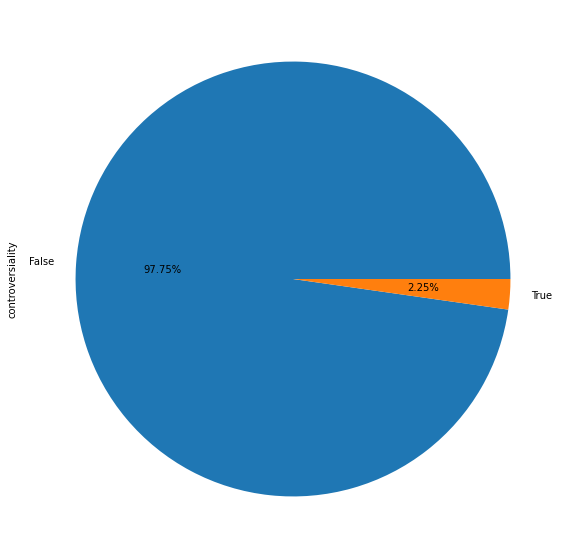

In [14]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [15]:
df['stickied'] = df['stickied'].replace(0,False)
df['stickied'] = df['stickied'].replace(1,True)

False    448101
True          9
Name: stickied, dtype: int64


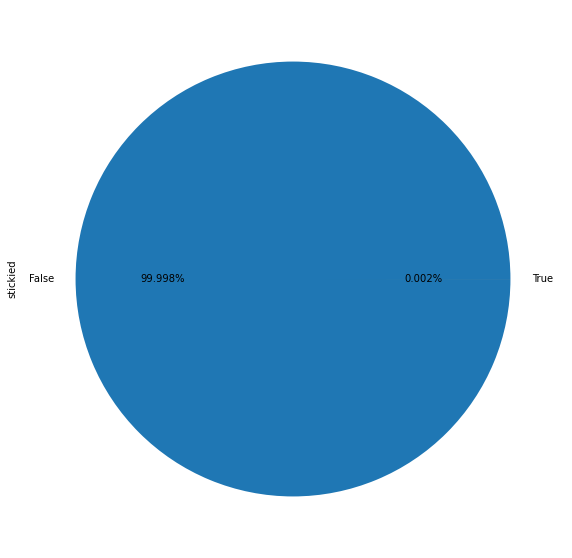

In [16]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["stickied"].value_counts())

# Link_id

t3_dv9afw    5244
t3_e025s8    3659
t3_dwmlki    3625
t3_dsj4nn    3131
t3_dtynnb    2600
             ... 
t3_dttdm0       1
t3_dttelx       1
t3_dtt2ly       1
t3_dtu373       1
t3_e45xux       1
Name: link_id, Length: 36740, dtype: int64


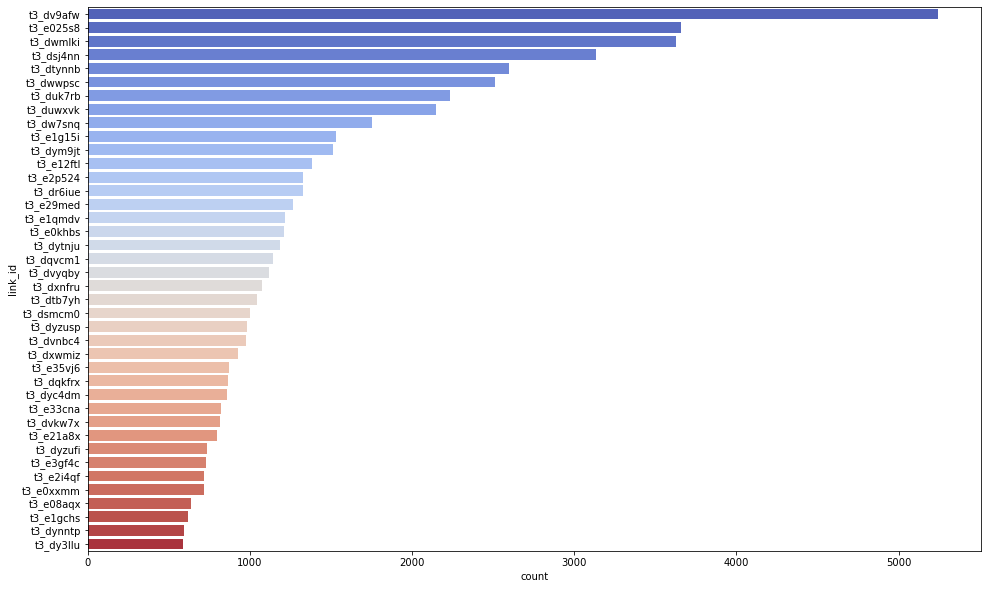

In [17]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [18]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 36740


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

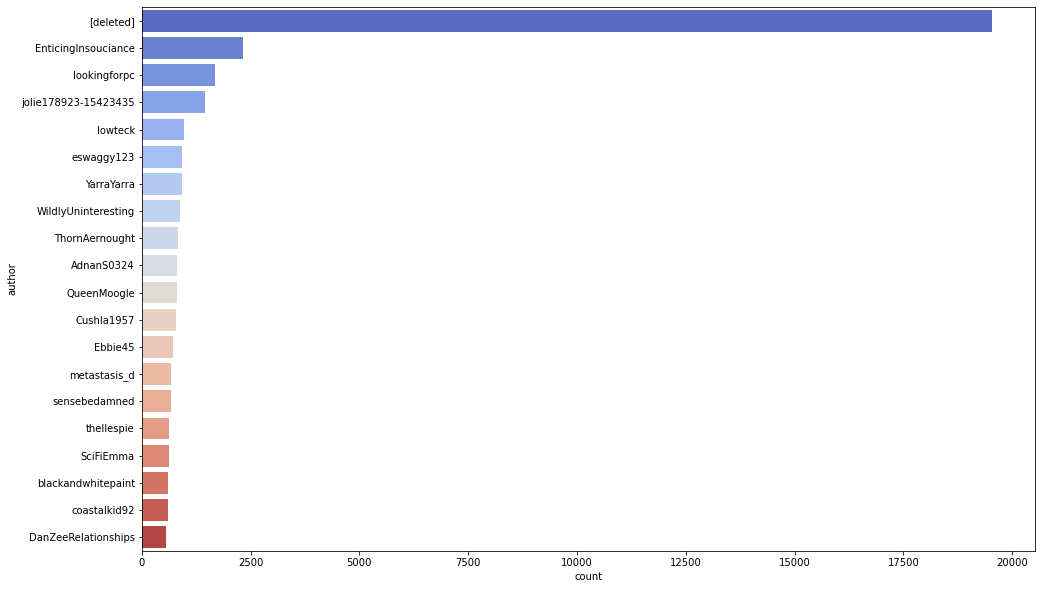

In [19]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

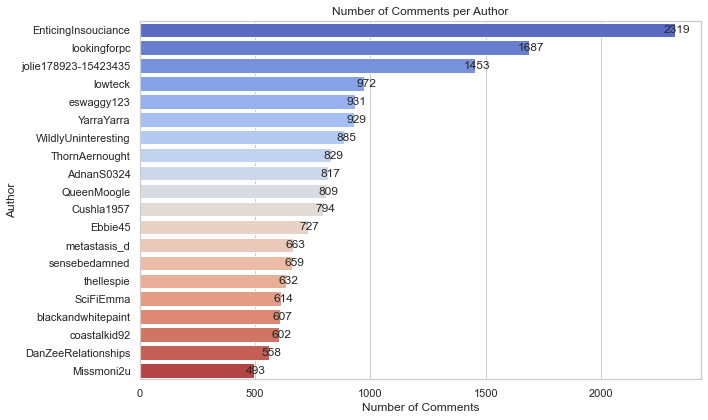

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [21]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 88362


In [22]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 12.20


In [23]:
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 5.07


# Hours

([<matplotlib.axis.XTick at 0x7f864b7caaf0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

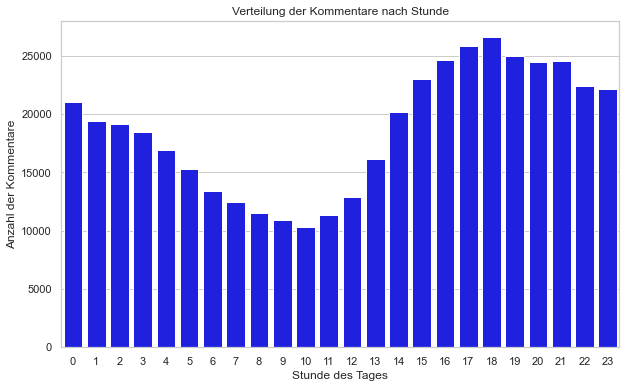

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

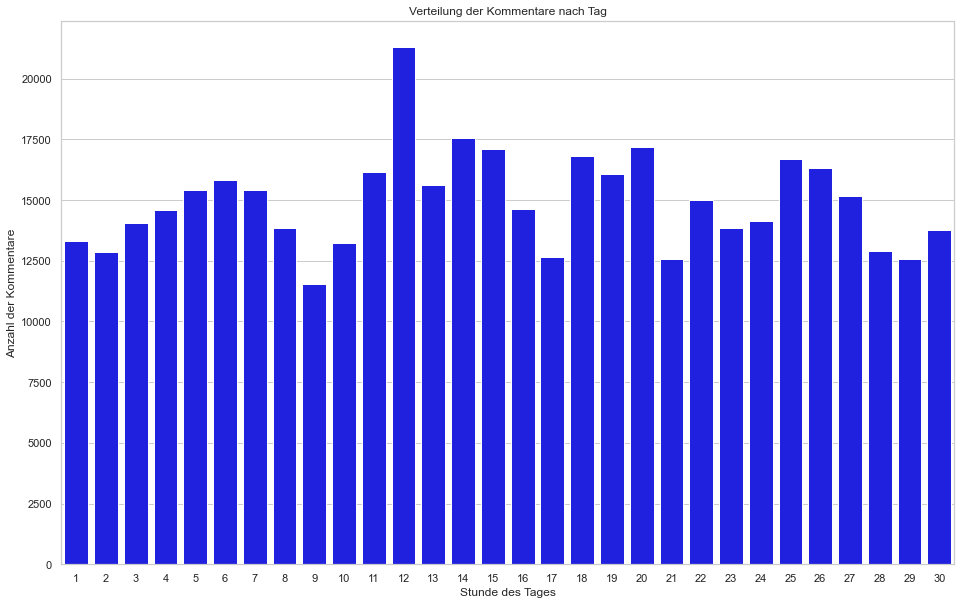

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    447948
1       143
2        15
3         2
7         1
4         1
Name: gilded, dtype: int64


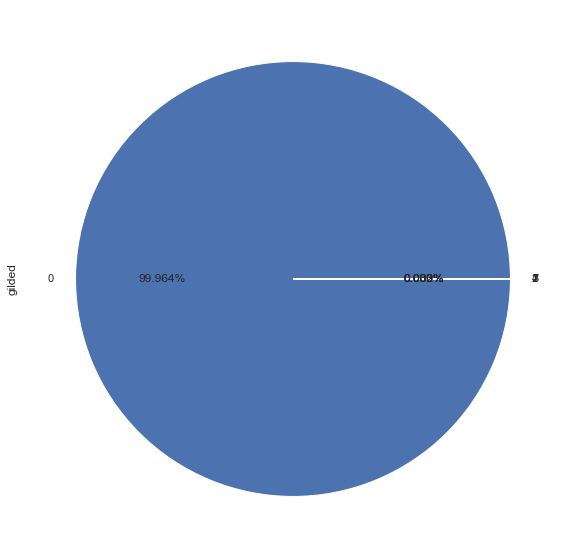

In [26]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["gilded"].value_counts())

# Distinguished

In [27]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False        448094
moderator        16
Name: distinguished, dtype: int64


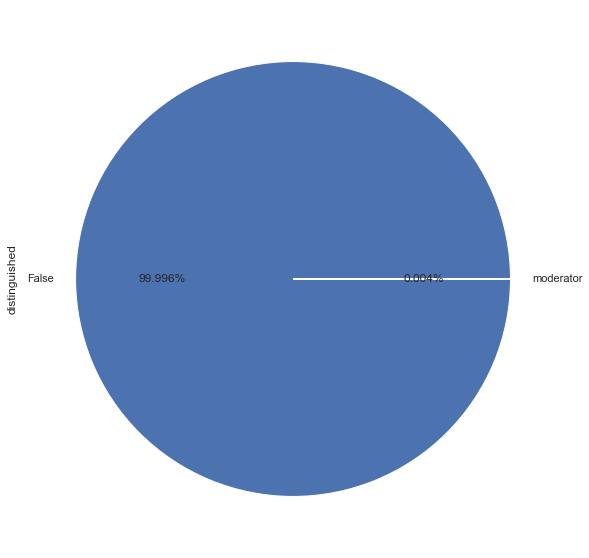

In [28]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [29]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    438035
True      10075
Name: edited, dtype: int64


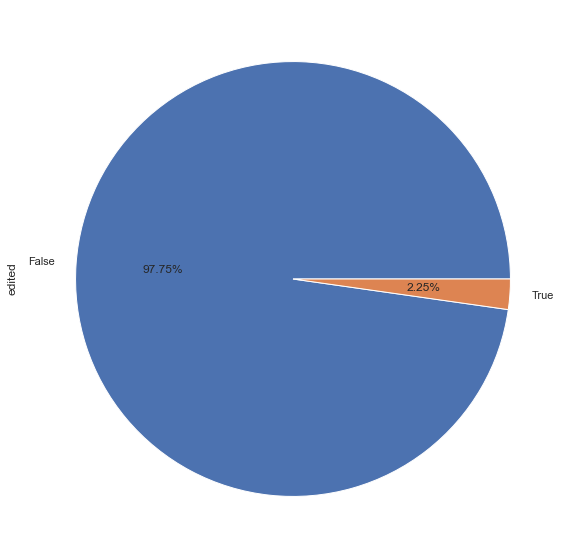

In [30]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [31]:
df["score"].mean()

9.789803842806453

In [32]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
214673,jillbowaggins,Early 30s Female,Time to delete the whole boyfriend,False,2019-11-15 06:12:36,False,False,1,f7k8kn9,t3_dwmlki,t3_dwmlki,23396,False,6,15,2019,Time to delete the whole boyfriend,6
214662,Flarebear99,0,That sounds like some psychopathic shit. Huge ...,False,2019-11-15 06:11:34,False,False,0,f7k8im7,t3_dwmlki,t3_dwmlki,17029,False,6,15,2019,That sounds like some psychopathic shit . Huge...,18
226984,Shanashy,0,"""Dan, the way you acted towards me when we wer...",False,2019-11-15 22:47:40,False,False,2,f7madxu,t3_dwwpsc,t3_dwwpsc,15010,False,22,15,2019,Dan the way you acted towards me when we were ...,39
123132,motosandguns,0,You don’t know if it was intentional? He shove...,False,2019-11-09 17:15:33,False,False,1,f6zpqfu,t3_dtynnb,t3_dtynnb,14207,False,17,9,2019,You don t know if it was intentional He shoved...,37
360328,PM_UR_FELINES,0,Adults don’t do this to each other.,False,2019-11-24 23:09:56,False,False,1,f8myy7s,t3_e12ftl,t1_f8mho0s,12177,False,23,24,2019,Adults don t do this to each other .,9
369278,dalekosam,0,He's not crossing a line because he has a clos...,False,2019-11-25 14:12:46,False,True,0,f8ovurf,t3_e1g15i,t3_e1g15i,11585,False,14,25,2019,He s not crossing a line because he has a clos...,162
343288,Dominoodles,0,- Didn't stop when you said no - Didn't stop w...,False,2019-11-23 18:58:19,False,False,2,f8eybgo,t3_e0khbs,t3_e0khbs,10092,False,18,23,2019,Didn t stop when you said no Didn t stop when ...,58
359037,[deleted],0,I'm gonna take a shot in the dark and guess th...,False,2019-11-24 21:24:58,False,False,0,f8mevc8,t3_e12ftl,t3_e12ftl,9851,False,21,24,2019,I m gon na take a shot in the dark and guess t...,24
324824,trextine,0,Also the only person who knows what is best fo...,False,2019-11-22 15:11:13,False,False,0,f8bf9qm,t3_e025s8,t3_e025s8,9766,False,15,22,2019,Also the only person who knows what is best fo...,49
123082,zenfrog80,0,This is horrible behavior. Yes it’s intentional,False,2019-11-09 17:11:32,False,False,0,f6zp4jm,t3_dtynnb,t3_dtynnb,9735,False,17,9,2019,This is horrible behavior . Yes it s intentional,9


In [33]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
23933,NumerousFront,0,How can I make him stop doing it?,False,2019-11-02 20:42:59,False,False,0,f68cd7v,t3_dqq30d,t1_f68brf1,-473,False,20,2,2019,How can I make him stop doing it,8
445674,Hike_bike_fish_love,0,Fuck yeah! Leave and find a doormat that will ...,False,2019-11-30 20:25:06,False,False,0,f96idct,t3_e40895,t1_f95vw8k,-424,False,20,30,2019,Fuck yeah Leave and find a doormat that will p...,18
19263,ThrowRA29837,0,I don't understand how scars can ever be attra...,False,2019-11-02 14:01:14,False,False,0,f65ll3t,t3_dqkfrx,t1_f65l9gi,-422,False,14,2,2019,I don t understand how scars can ever be attra...,19
54899,[deleted],0,not only that but if you give an addict ANYTHI...,False,2019-11-05 00:04:57,False,True,0,f6kh9p0,t3_drq6zh,t1_f6kd9e9,-410,False,0,5,2019,not only that but if you give an addict ANYTHI...,57
188406,ThrowRaAmelia,0,I understand what you're saying but he did mak...,False,2019-11-13 18:45:41,False,False,0,f7f2312,t3_dvw4rb,t1_f7f1wv8,-375,False,18,13,2019,I understand what you re saying but he did mak...,40
361921,RareLemons,0,"LMAO ""abusive relationship"" He's just being ch...",False,2019-11-25 00:55:23,False,False,0,f8ng8ig,t3_e12ftl,t1_f8lyoqc,-365,False,0,25,2019,LMAO abusive relationship He s just being chil...,20
419080,[deleted],0,because that's called being an adult with chil...,False,2019-11-28 19:16:50,False,False,0,f906fxc,t3_e31jvr,t1_f8zt78f,-335,False,19,28,2019,because that s called being an adult with chil...,33
277106,cruisesaintcool,0,We're still gonna go through the itinerary tog...,False,2019-11-19 08:07:54,False,True,0,f815cex,t3_dyhbtk,t1_f8155ta,-323,False,8,19,2019,We re still gon na go through the itinerary to...,222
148213,JohnDuLion,Early 30s Male,Technically they're not siblings.,False,2019-11-11 14:37:01,False,False,0,f781wn0,t3_dut48v,t1_f781jra,-302,False,14,11,2019,Technically they re not siblings .,6
248913,ishitinthemilk,0,If my partner was insanely upset about me stay...,False,2019-11-17 16:24:43,False,False,0,f7tuuja,t3_dxnfru,t1_f7tazqi,-295,False,16,17,2019,If my partner was insanely upset about me stay...,19


# Score vs hours on comments

<AxesSubplot:xlabel='created_hour', ylabel='score'>

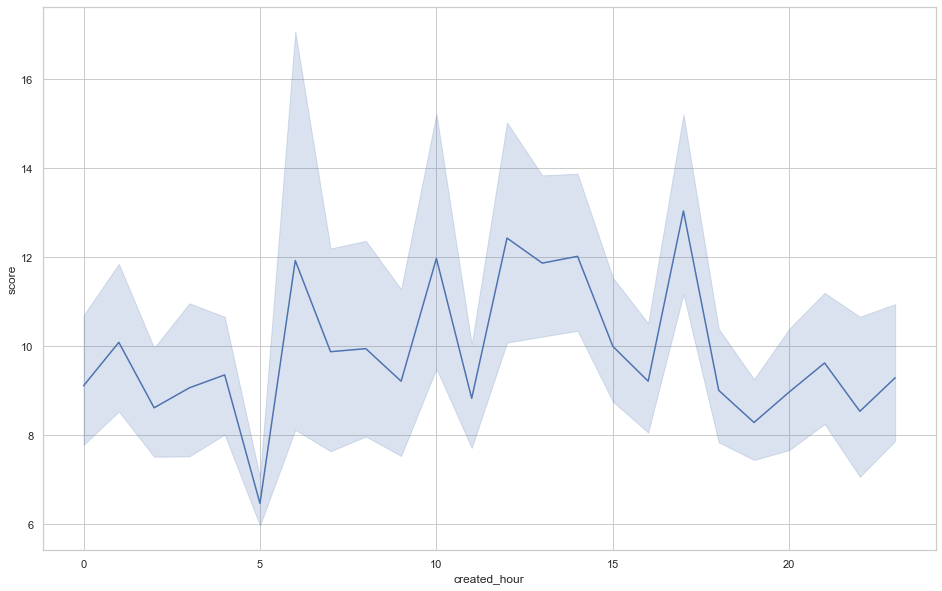

In [34]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs Score on Comments

<AxesSubplot:xlabel='created_day', ylabel='score'>

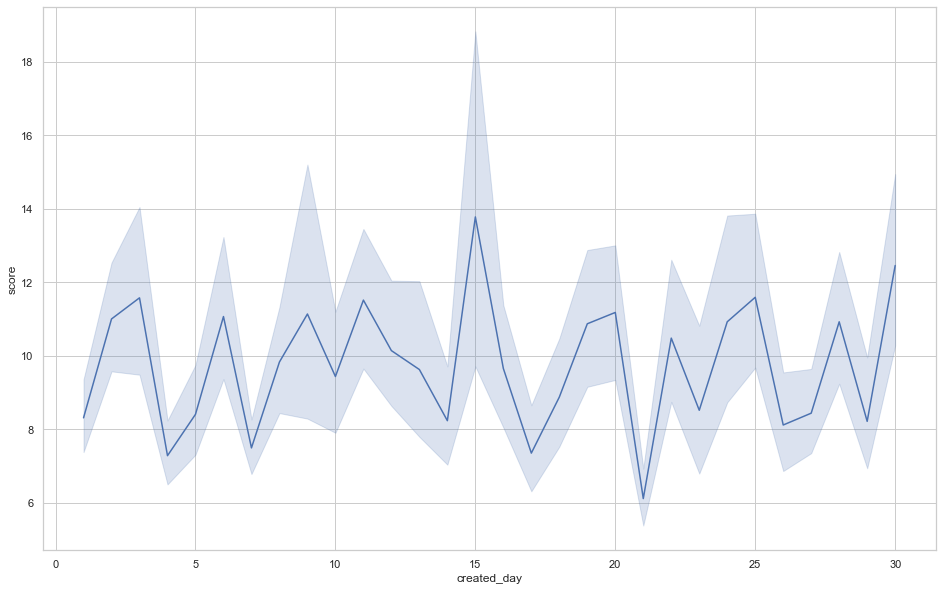

In [35]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

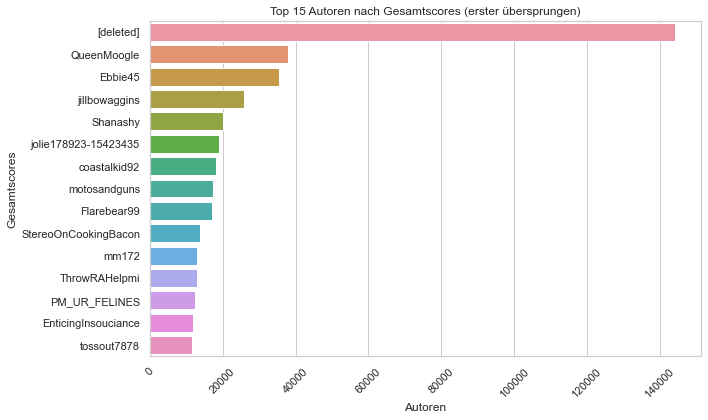

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[:15]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

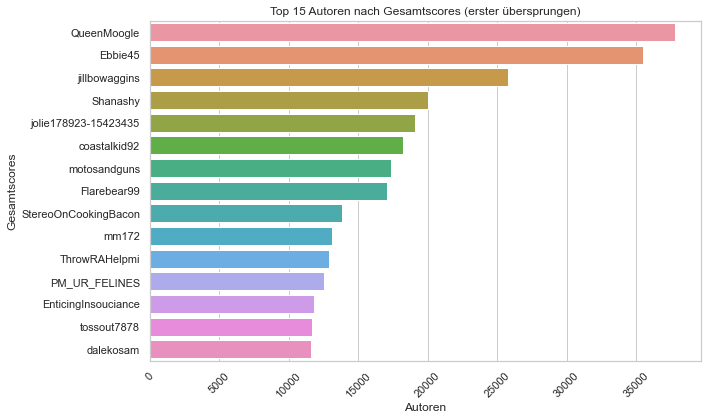

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den Autor "[deleted]" aus der sortierten Liste entfernen
sorted_authors = sorted_authors[sorted_authors.index != "[deleted]"]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
df.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,448110.000000,448110.000000,448110.000000,448110.000000,448110.0,448110.000000
mean,0.000424,9.789804,12.564214,15.503356,2019.0,58.222354
std,0.025260,122.341467,7.258202,8.438749,0.0,70.446740
min,0.000000,-473.000000,0.000000,1.000000,2019.0,1.000000
25%,0.000000,1.000000,6.000000,8.000000,2019.0,17.000000
50%,0.000000,1.000000,14.000000,15.000000,2019.0,37.000000
75%,0.000000,3.000000,19.000000,23.000000,2019.0,74.000000
max,7.000000,23396.000000,23.000000,30.000000,2019.0,1986.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448110 entries, 0 to 448525
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             448110 non-null  object
 1   author_flair_text  448110 non-null  object
 2   body               448110 non-null  object
 3   controversiality   448110 non-null  bool  
 4   created_utc        448110 non-null  object
 5   distinguished      448110 non-null  object
 6   edited             448110 non-null  bool  
 7   gilded             448110 non-null  int64 
 8   id                 448110 non-null  object
 9   link_id            448110 non-null  object
 10  parent_id          448110 non-null  object
 11  score              448110 non-null  int64 
 12  stickied           448110 non-null  bool  
 13  created_hour       448110 non-null  int64 
 14  created_day        448110 non-null  int64 
 15  created_year       448110 non-null  int64 
 16  clean_text         4

# Save cleaned general data

In [40]:
df.to_csv("relationship_advise_19_comments_EDA_clean.csv",index=False,sep=";")

In [41]:
import pandas as pd
df_new=pd.read_csv("relationship_advise_19_comments_EDA_clean.csv",sep=";")
df_new.info()

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448110 entries, 0 to 448109
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             448110 non-null  object
 1   author_flair_text  448110 non-null  object
 2   body               448110 non-null  object
 3   controversiality   448110 non-null  bool  
 4   created_utc        448110 non-null  object
 5   distinguished      448110 non-null  object
 6   edited             448110 non-null  bool  
 7   gilded             448110 non-null  int64 
 8   id                 448110 non-null  object
 9   link_id            448110 non-null  object
 10  parent_id          448110 non-null  object
 11  score              448110 non-null  int64 
 12  stickied           448110 non-null  bool  
 13  created_hour       448110 non-null  int64 
 14  created_day        448110 non-null  int64 
 15  created_year       448110 non-null  int64 
 16  clean_text         4

False    448101
True          9
Name: stickied, dtype: int64


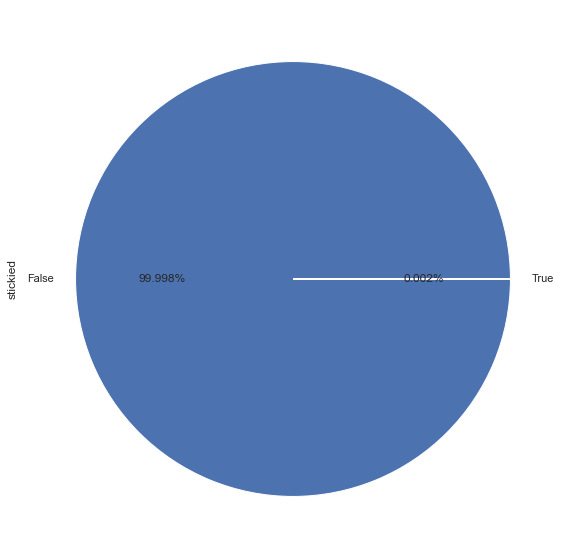

In [42]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df_new["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df_new["stickied"].value_counts())